## 요약 및 목차

### 저희는 카드사용횟수가 상위권인 서울시의 5개의 구와 4개의 상위 품목을 중심으로 분석을 진행했습니다.
### 이번에는 R을 사용하여 코로나 확진자 데이터의 분포와 지역, 나이, 성별 특성을 ggplot library를 통해 알아보고 확진자가 많은 그룹에서의 소비 트렌드 시각화 및 Clustering과 ARIMA 모형을 통한 시계열 분석을 해보고자 합니다.

### 1번에서 4번 순서로 분석이 진행됩니다.
### 1. ggplot을 통해 소비 품목의 특징, 코로나 확진자 데이터, 확진자 수에 따라 달라지는 상위 소비 품목의 추이 관측 시각화
### 2. 자연어 처리와 wordcloud를 통한 확진자가 많이 나타나는 그룹에서의 소비 트렌드 관측 시각화
### 3-1. 코로나 Region 데이터를 활용한 기관 개수별 도시 Clustering
### 3-2. 서울 각 구 별 카드 지출 Clustering
### 4. ARIMA 모형을 통한 시계열 분석 - 특정 구, 품목, 배달 데이터 예측
### 결론

### 감사합니다.

##  필요한 라이브러리 설치 및 호출

In [2]:
#install.packages("rlang")
library(ggplot2)
library(readxl)
library(readr)
#install.packages("ggcorrplot")
library(ggcorrplot)
library(data.table)
#install.packages("forecast")
library(forecast)
library(dplyr)

In [87]:
library(factoextra)
library(tibble)
library(stringr)
library(wordcloud)
library(RColorBrewer)

In [81]:
install.packages("https://cran.r-project.org/src/contrib/Archive/KoNLP/KoNLP_0.80.2.tar.gz", repos = NULL, type="source",INSTALL_opts=c('--no-lock'))

In [69]:
library(rJava)
library(digest)
library(Sejong)
library(hash)
library(tau)
library(RSQLite)
library(devtools)

Warning message:
"package 'rJava' was built under R version 3.6.3"

In [83]:
library(KoNLP)

In [86]:
useNIADic()

Backup was just finished!


digest      (0.6.18   -> 0.6.25  ) [CRAN]
glue        (1.3.1    -> 1.4.1   ) [CRAN]
pkgconfig   (2.0.2    -> 2.0.3   ) [CRAN]
fansi       (0.4.0    -> 0.4.1   ) [CRAN]
R6          (2.4.0    -> 2.4.1   ) [CRAN]
farver      (NA       -> 2.0.3   ) [CRAN]
ps          (1.3.0    -> 1.3.3   ) [CRAN]
backports   (1.1.4    -> 1.1.8   ) [CRAN]
prettyunits (1.0.2    -> 1.1.1   ) [CRAN]
withr       (2.1.2    -> 2.2.0   ) [CRAN]
evaluate    (0.13     -> 0.14    ) [CRAN]
xfun        (0.6      -> 0.16    ) [CRAN]
stringi     (1.4.3    -> 1.4.6   ) [CRAN]
mime        (0.6      -> 0.9     ) [CRAN]
yaml        (2.2.0    -> 2.2.1   ) [CRAN]
markdown    (0.9      -> 1.1     ) [CRAN]
tibble      (2.1.3    -> 3.0.3   ) [CRAN]
scales      (1.0.0    -> 1.1.1   ) [CRAN]
tinytex     (0.12     -> 0.25    ) [CRAN]
jsonlite    (1.6      -> 1.7.0   ) [CRAN]
htmltools   (0.3.6    -> 0.5.0   ) [CRAN]
knitr       (1.22     -> 1.29    ) [CRAN]
BH          (1.69.0-1 -> 1.72.0-3) [CRAN]
Rcpp        (1.0.1    -> 1.0.5   )

Installing 27 packages: digest, glue, pkgconfig, fansi, R6, farver, ps, backports, prettyunits, withr, evaluate, xfun, stringi, mime, yaml, markdown, tibble, scales, tinytex, jsonlite, htmltools, knitr, BH, Rcpp, ggplot2, data.table, rmarkdown



  There are binary versions available but the source versions are later:
           binary source needs_compilation
backports   1.1.7  1.1.8              TRUE
xfun         0.15   0.16              TRUE
tinytex      0.24   0.25             FALSE
data.table 1.12.8 1.13.0              TRUE



ERROR: Error: Failed to install 'unknown package' from URL:
  (converted from warning) packages 'digest', 'tibble', 'ggplot2' are in use and will not be installed


ERROR: Error in tryCatch({: can't install NIADic package!
 Please refer 'https://github.com/haven-jeon/NIADic' to install.


In [100]:
getwd()
setwd("C:/python_data/input")

[1] "C:/python_data"

In [62]:
Sys.setenv(JAVA_HOME="C:/Program Files/Java/jdk-12.0.2")
Sys.getenv("JAVA_HOME")

[1] "C:/Program Files/Java/jdk-12.0.2"

In [4]:
# 가상 메모리 공간 확장
memory.size(max = TRUE) 
memory.size(max = FALSE)
memory.limit(size = NA)

memory.limit(size = 50000) 

[1] 124.88

[1] 123.5

[1] 4017

[1] 50000

In [102]:
index_csv=read_csv("./index.csv")
index=as.data.frame(index_csv)

Parsed with column specification:
cols(
  period = col_double(),
  catl = col_character(),
  catm = col_character(),
  age = col_double(),
  gender = col_character(),
  sido = col_character(),
  sigungu = col_character(),
  cgi = col_double()
)
Warning message:
"21343 parsing failures.
 row col expected actual          file
6242 age a double    all './index.csv'
6243 age a double    all './index.csv'
6244 age a double    all './index.csv'
6245 age a double    all './index.csv'
6246 age a double    all './index.csv'
.... ... ........ ...... .............
See problems(...) for more details.
"

In [ ]:
popl=read.csv("./pop_date.csv")

In [87]:
delivery_csv=read_csv("./input/delivery.csv") #
delivery=as.data.frame(delivery_csv)

Parsed with column specification:
cols(
  .default = col_character(),
  SERIAL_NUMBER = col_double(),
  PROCESS_DT = col_date(format = ""),
  DLVR_REQUST_STTUS_VALUE = col_double(),
  DLVR_STORE_LEGALDONG_CODE = col_double(),
  DLVR_STORE_ADSTRD_CODE = col_double(),
  DLVR_STORE_RDNMADR_CODE = col_double(),
  DLVR_DSTN_LEGALDONG_CODE = col_double(),
  DLVR_DSTN_ADSTRD_CODE = col_double(),
  DLVR_DSTN_RDNMADR_CODE = col_double(),
  DLVR_AMOUNT = col_double(),
  CALL_RLAY_FEE_AMOUNT = col_double(),
  GOODS_AMOUNT = col_double(),
  SETLE_KND_VALUE = col_double(),
  DLVR_RCEPT_TIME = col_datetime(format = ""),
  DLVR_CARALC_TIME = col_datetime(format = ""),
  DLVR_COMPT_TIME = col_datetime(format = ""),
  DLVR_CANCL_TIME = col_datetime(format = "")
)
See spec(...) for full column specifications.


In [21]:
table=read_excel("./COVID_eng_kor_table.xlsx")

In [105]:
TimeAge=read.csv("./CovidTimeAge.csv")
TimeGender=read.csv("./CovidTimeGender.csv")
TimeProvince_csv=read_csv("./CovidTimeProvince.csv") #
TimeProvince=as.data.frame(TimeProvince_csv)
Time=read.csv("./CovidTime.csv")
Region_csv=read_csv("./CovidRegion.csv") #
Region=as.data.frame(Region_csv)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  province = col_character(),
  confirmed = col_double(),
  released = col_double(),
  deceased = col_double()
)
Parsed with column specification:
cols(
  code = col_double(),
  province = col_character(),
  city = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  elementary_school_count = col_double(),
  kindergarten_count = col_double(),
  university_count = col_double(),
  academy_ratio = col_double(),
  elderly_population_ratio = col_double(),
  elderly_alone_ratio = col_double(),
  nursing_home_count = col_double()
)


In [104]:
card_csv=read_csv("./card.csv") #
card=as.data.frame(card_csv)

Parsed with column specification:
cols(
  receipt_dttm = col_double(),
  adstrd_code = col_double(),
  adstrd_nm = col_character(),
  mrhst_induty_cl_code = col_double(),
  mrhst_induty_cl_nm = col_character(),
  selng_cascnt = col_character(),
  salamt = col_character()
)


In [182]:
card_g_csv=read_csv("./관악구카드사용.csv")
card_g=as.data.frame(card_g_csv)
patient_pop_csv=read_csv("./확진자_통행량.csv")
patient_pop=as.data.frame(patient_pop_csv)

Parsed with column specification:
cols(
  receipt_dttm = col_double(),
  adstrd_code = col_double(),
  adstrd_nm = col_character(),
  mrhst_induty_cl_code = col_double(),
  mrhst_induty_cl_nm = col_character(),
  selng_cascnt = col_double(),
  salamt = col_double(),
  date = col_date(format = ""),
  month = col_character(),
  code = col_double()
)
Parsed with column specification:
cols(
  gu = col_character(),
  popltn_cascnt = col_double(),
  confirmed = col_double()
)


In [135]:
PatientInfo_csv=read_csv("./CovidPatientInfo.csv") #
PatientInfo=as.data.frame(PatientInfo_csv)
Policy=read.csv("./CovidPolicy.csv")
Case_csv=read_csv("./CovidCase.csv") #
Case=as.data.frame(Case_csv)
adstrd_csv=read_csv("./adstrd_master.csv") #
adstrd=as.data.frame(adstrd_csv)

Parsed with column specification:
cols(
  patient_id = col_double(),
  sex = col_character(),
  age = col_character(),
  country = col_character(),
  province = col_character(),
  city = col_character(),
  infection_case = col_character(),
  infected_by = col_double(),
  contact_number = col_double(),
  symptom_onset_date = col_date(format = ""),
  confirmed_date = col_date(format = ""),
  released_date = col_date(format = ""),
  deceased_date = col_logical(),
  state = col_character()
)
Warning message:
"71 parsing failures.
 row           col           expected     actual                     file
1469 deceased_date 1/0/T/F/TRUE/FALSE 2020-02-23 './CovidPatientInfo.csv'
1508 deceased_date 1/0/T/F/TRUE/FALSE 2020-02-26 './CovidPatientInfo.csv'
1509 deceased_date 1/0/T/F/TRUE/FALSE 2020-03-02 './CovidPatientInfo.csv'
1510 deceased_date 1/0/T/F/TRUE/FALSE 2020-03-04 './CovidPatientInfo.csv'
1511 deceased_date 1/0/T/F/TRUE/FALSE 2020-03-01 './CovidPatientInfo.csv'
.... ............. .....

In [103]:
sep_csv=read_csv("./sep_gu.csv")
sep=as.data.frame(sep_csv)
food_value_csv=read_csv("./card_food_value_count.csv")
food_value=as.data.frame(food_value_csv)

Parsed with column specification:
cols(
  gu = col_character(),
  `01월` = col_double(),
  `02월` = col_double(),
  `03월` = col_double(),
  `04월` = col_double(),
  `05월` = col_double(),
  `06월` = col_double(),
  adstrd_code = col_double()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  adstrd_nm = col_character(),
  month = col_character(),
  salamt = col_double(),
  selng_cascnt = col_double(),
  gu = col_character()
)


In [26]:
cor_h_csv=read_csv("./input/corona_미용.csv")
cor_h=as.data.frame(cor_h_csv)
cor_d_csv=read_csv("./input/corona_의료.csv")
cor_d=as.data.frame(cor_d_csv)
cor_f_csv=read_csv("./input/corona_음식.csv")
cor_f=as.data.frame(cor_f_csv)
cor_a_csv=read_csv("./input/corona_취미학원.csv")
cor_a=as.data.frame(cor_a_csv)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  province = col_character(),
  confirmed = col_double(),
  released = col_double(),
  deceased = col_double(),
  selng_cascnt = col_double()
)
Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  province = col_character(),
  confirmed = col_double(),
  released = col_double(),
  deceased = col_double(),
  selng_cascnt = col_double()
)
Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  province = col_character(),
  confirmed = col_double(),
  released = col_double(),
  deceased = col_double(),
  selng_cascnt = col_double()
)
Parsed with column specification:
cols(
  date = col_date(format = ""),
  time = col_double(),
  province = col_character(),
  confirmed = col_double(),
  released = col_double(),
  deceased = col_double(),
  selng_cascnt = col_double()
)


In [48]:
h_gu_csv=read_csv("./input/beauty최종.csv")
h_gu=as.data.frame(h_gu_csv)
d_gu_csv=read_csv("./input/med최종.csv")
d_gu=as.data.frame(d_gu_csv)
f_gu_csv=read_csv("./input/food최종.csv")
f_gu=as.data.frame(f_gu_csv)
a_gu_csv=read_csv("./input/hobby최종.csv")
a_gu=as.data.frame(a_gu_csv)

Parsed with column specification:
cols(
  gu = col_character(),
  date = col_date(format = ""),
  salamt = col_double()
)
Parsed with column specification:
cols(
  gu = col_character(),
  date = col_date(format = ""),
  salamt = col_double()
)
Parsed with column specification:
cols(
  gu = col_character(),
  date = col_date(format = ""),
  salamt = col_double()
)
Parsed with column specification:
cols(
  gu = col_character(),
  date = col_date(format = ""),
  salamt = col_double()
)


### *결측치 - 사이킷런 활용하여 보간하였음 (python)

#### index 품목별 소비지수 : (age, gender, sido, sigungu) & cgi (cgi : 월평균 대비 매출 성장 비율, 100을 기준으로 이상이면 매출 상승, 이하면 하락)

In [101]:
head(index)

period,catl,catm,age,gender,sido,sigungu,cgi
201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.37464
201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.59645
201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.99285
201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.34273
201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.14760
201901,건강/의료용품,건강관리용품,20,F,서울,성북구,78.89383


#### fpopl 데이터의 date를 시계열로 변경

In [18]:
head(popl)

X,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,date
0,0,M,age_00,11650560,15,2020-01-01
1,0,M,age_00,11590620,6,2020-01-01
2,0,M,age_00,11560710,4,2020-01-01
3,0,M,age_00,11470680,12,2020-01-01
4,0,M,age_00,11350665,6,2020-01-01
5,0,M,age_00,11305575,10,2020-01-01


#### delivery 배달 호출 정보 : date 별로 배달 상점 업종 / 위치, 배달 목적지 위치, 배달 비용 및 수수료, 카드 금액, 배달 완료 시간- 배달 요청 시간에 따른 취소 건수 분석

In [20]:
head(delivery)

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NA
4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NA,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NA
4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NA
4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NA,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NA
4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NA,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NA
4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,...,D0004834,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NA


#### 코로나 확진자가 많은 지역, 나이, 성별 관측을 위한 데이터셋

In [117]:
head(TimeAge)

date,time,age,confirmed,deceased
2020-03-02,0,0s,32,0
2020-03-02,0,10s,169,0
2020-03-02,0,20s,1235,0
2020-03-02,0,30s,506,1
2020-03-02,0,40s,633,1
2020-03-02,0,50s,834,5


In [118]:
head(TimeGender)

date,time,sex,confirmed,deceased
2020-03-02,0,male,1591,13
2020-03-02,0,female,2621,9
2020-03-03,0,male,1810,16
2020-03-03,0,female,3002,12
2020-03-04,0,male,1996,20
2020-03-04,0,female,3332,12


In [119]:
head(TimeProvince)

date,time,province,confirmed,released,deceased
2020-01-20,16,서울,0,0,0
2020-01-20,16,부산,0,0,0
2020-01-20,16,대구,0,0,0
2020-01-20,16,인천,1,0,0
2020-01-20,16,광주,0,0,0
2020-01-20,16,대전,0,0,0


In [136]:
head(Case)

case_id,province,city,group,infection_case,confirmed,latitude,longitude
1000001,서울,용산구,TRUE,Itaewon Clubs,139,37.538621,126.992652
1000002,서울,관악구,TRUE,Richway,119,37.48208,126.901384
1000003,서울,구로구,TRUE,Guro-gu Call Center,95,37.508163,126.884387
1000004,서울,양천구,TRUE,Yangcheon Table Tennis Club,43,37.546061,126.874209
1000005,서울,도봉구,TRUE,Day Care Center,43,37.679422,127.044374
1000006,서울,구로구,TRUE,Manmin Central Church,41,37.481059,126.894343


In [32]:
head(Time)

date,time,test,negative,confirmed,released,deceased
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0
2020-01-25,16,27,25,2,0,0


In [12]:
head(Region)

code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
10000,서울,서울,37.56695,126.9780,607,830,48,1.44,15.38,5.8,22739
10010,서울,강남구,37.51842,127.0472,33,38,0,4.18,13.17,4.3,3088
10020,서울,강동구,37.53049,127.1238,27,32,0,1.54,14.55,5.4,1023
10030,서울,강북구,37.63994,127.0255,14,21,0,0.67,19.49,8.5,628
10040,서울,강서구,37.55117,126.8495,36,56,1,1.17,14.39,5.7,1080
10050,서울,관악구,37.47829,126.9515,22,33,1,0.89,15.12,4.9,909


In [33]:
head(adstrd)

adstrd_code,adstrd_nm,brtc_nm,signgu_nm
11110515,청운효자동,서울특별시,종로구
11110530,사직동,서울특별시,종로구
11110540,삼청동,서울특별시,종로구
11110550,부암동,서울특별시,종로구
11110560,평창동,서울특별시,종로구
11110570,무악동,서울특별시,종로구


#### card 업종별 결제 금액 : date 별로 행정동, 가맹점 업종 frequency / 매출발생금액 & 건수

In [105]:
head(card)

receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
20200104,1174066000,성내3동,7041,약국,463,5843230
20200104,1174066000,성내3동,7022,치과의원,33,7835550
20200104,1174066000,성내3동,7021,한의원,53,4589800
20200104,1174066000,성내3동,7020,의원,339,9267240
20200104,1174066000,성내3동,6110,자동차정비,19,4441000
20200104,1174066000,성내3동,5199,기타 교육,54,1446900


In [80]:
head(card_g) # 관악구 카드 내역

receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,date,month,code
20200104,1162077500,난곡동,8399,기타음료식품,26,169500,2020-01-04,01월,11620775
20200104,1162077500,난곡동,8310,농축수산품,20,381600,2020-01-04,01월,11620775
20200104,1162077500,난곡동,8302,정 육 점,37,792700,2020-01-04,01월,11620775
20200104,1162077500,난곡동,8301,제과점,65,629080,2020-01-04,01월,11620775
20200104,1162077500,난곡동,8021,스넥,78,1228700,2020-01-04,01월,11620775
20200104,1162077500,난곡동,8013,주점,11,345100,2020-01-04,01월,11620775


In [126]:
head(sep) # 구별 카드 소비 액수

gu,01월,02월,03월,04월,05월,06월,adstrd_code
강남구,141061708,140593156,135842860,139051779,149267546,81396969,256973943
강동구,73514971,65048092,65865410,68679432,72736489,37528897,211330810
강북구,31949246,29025920,29853545,30254170,32577320,17979089,146972730
강서구,76070267,67149625,67752012,71958400,78033299,40844636,230011658
관악구,60235108,54132829,54025666,55378701,59029026,30938995,244033670
광진구,64586520,57187914,57512192,59576011,64114238,34381259,168236967


In [57]:
head(food_value) # 구별 음식 소비 횟수, 소비 액수 데이터

X1,adstrd_nm,month,salamt,selng_cascnt,gu
0,가락1동,01월,1040607348,27955,종로구
1,가락1동,02월,719945187,19125,종로구
2,가락1동,03월,871955047,26036,종로구
3,가락1동,04월,1097621546,29217,종로구
4,가락1동,05월,1235012563,34279,종로구
5,가락1동,06월,559990633,15408,종로구


#### 확진자 수에 따른 품목별 소비 추이를 알아보기 위해 데이터를 전처리 하였습니다.

In [27]:
d<-cor_d %>% select(selng_cascnt)
f<-cor_f %>% select(selng_cascnt)
a<-cor_a %>% select(selng_cascnt)

In [28]:
cor_h['selng_cascnt_d']=d
cor_h['selng_cascnt_f']=f
cor_h['selng_cascnt_a']=a

In [31]:
head(cor_h)

date,time,province,confirmed,released,deceased,selng_cascnt,selng_cascnt_d,selng_cascnt_f,selng_cascnt_a
2020-01-27,16,서울,1,0,0,13523,6993,519420,1313
2020-01-28,16,서울,1,0,0,23839,14571,627343,2776
2020-01-29,16,서울,1,0,0,38170,42966,844457,12632
2020-01-30,16,서울,3,0,0,33885,49266,921560,13393
2020-01-31,16,서울,4,0,0,33019,49099,933545,13003
2020-02-01,16,서울,4,0,0,34827,46631,951746,14309


In [49]:
head(h_gu)

gu,date,salamt
강남구,2020-01-04,897171258
강남구,2020-01-05,651639826
강남구,2020-01-06,314540902
강남구,2020-01-07,741964452
강남구,2020-01-08,761900730
강남구,2020-01-09,738246948


In [23]:
head(d_gu)

gu,date,salamt
강남구,2020-01-04,216555232
강남구,2020-01-05,49029500
강남구,2020-01-07,139386506
강남구,2020-01-08,266637478
강남구,2020-01-09,94681081
강남구,2020-01-10,151112257


In [22]:
head(f_gu)

gu,date,salamt
강남구,2020-01-04,3796763623
강남구,2020-01-05,2899311915
강남구,2020-01-06,1957249426
강남구,2020-01-07,3219222110
강남구,2020-01-08,3435738858
강남구,2020-01-09,3684697154


In [24]:
head(a_gu)

gu,date,salamt
강남구,2020-01-04,962884650
강남구,2020-01-05,662722645
강남구,2020-01-06,242597373
강남구,2020-01-07,677340467
강남구,2020-01-08,514889060
강남구,2020-01-09,442268460


## ggplot을 활용한 데이터 시각화

### 소비지수에 따른 카테고리의 비율은 화장품 > 식품 > 일용품 > 건강/의료용품 (Outlier 제외)

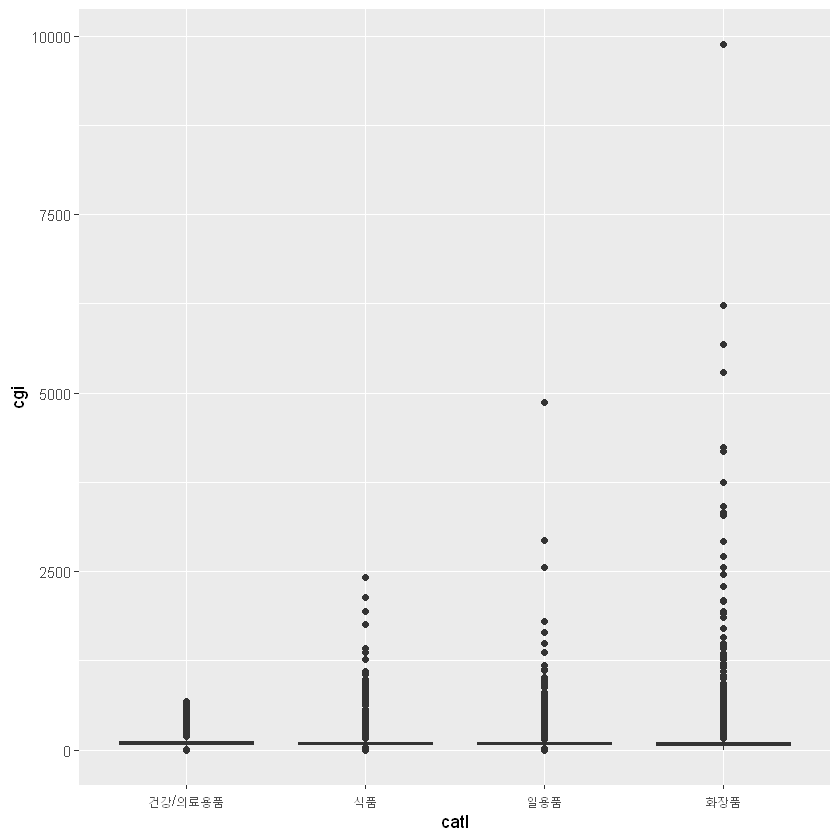

In [7]:
ggplot(index, aes(x=catl, y=cgi))+geom_boxplot()

### 시군구에 따른 카테고리의 비율은 식품 > 화장품 > 일용품 > 건강/의료용품

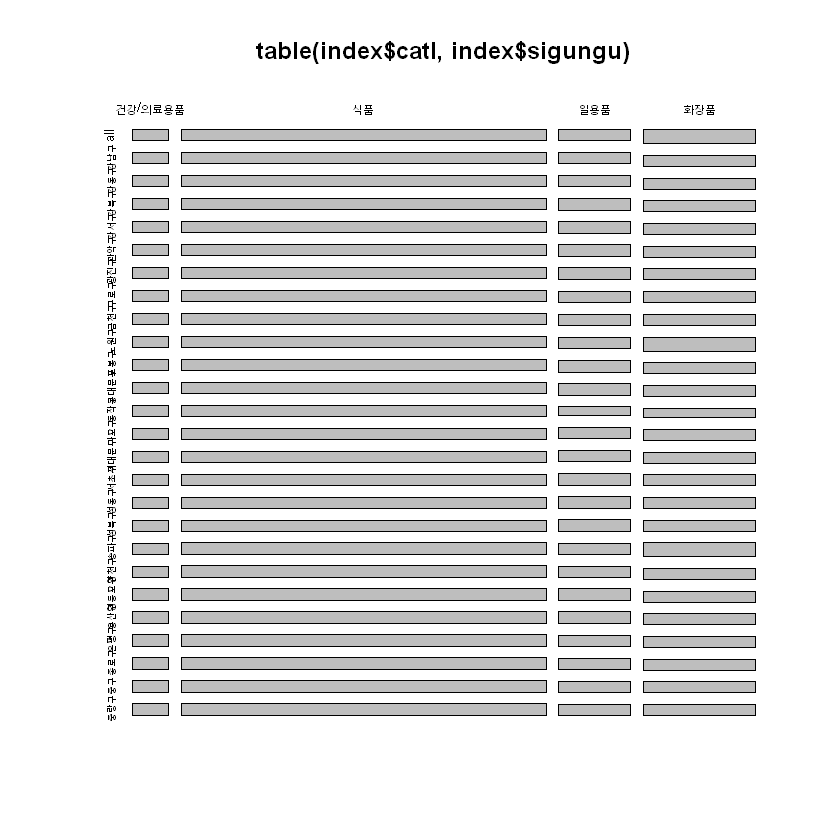

In [6]:
mosaicplot(table(index$catl, index$sigungu))

### 나이에 따른 소비지수의 비율은 대체로 나이가 어릴수록 높아보입니다. (Outlier 제외)

Warning message:
"Removed 21343 rows containing missing values (geom_point)."

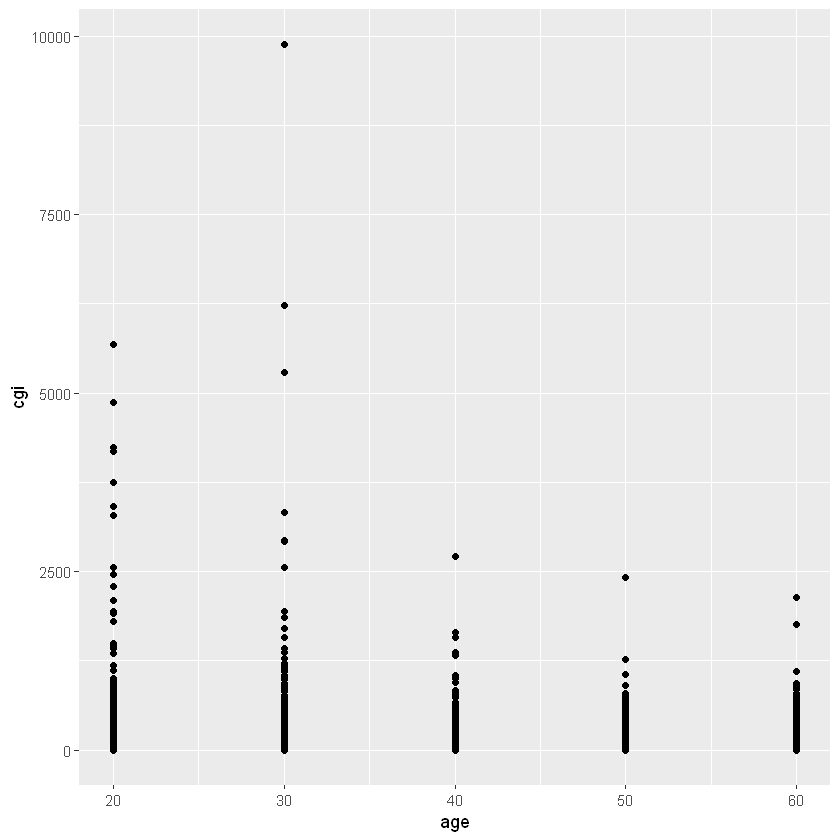

In [115]:
i_cgi=ggplot(index,aes(x=age,y=cgi))+geom_point()
i_cgi2=i_cgi+scale_x_continuous(name="age")+scale_y_continuous(name="cgi")
i_cgi2

### 코로나 확진자 수는 20대 > 50대 > 40대 > 60대 > 30대 ... 순입니다.

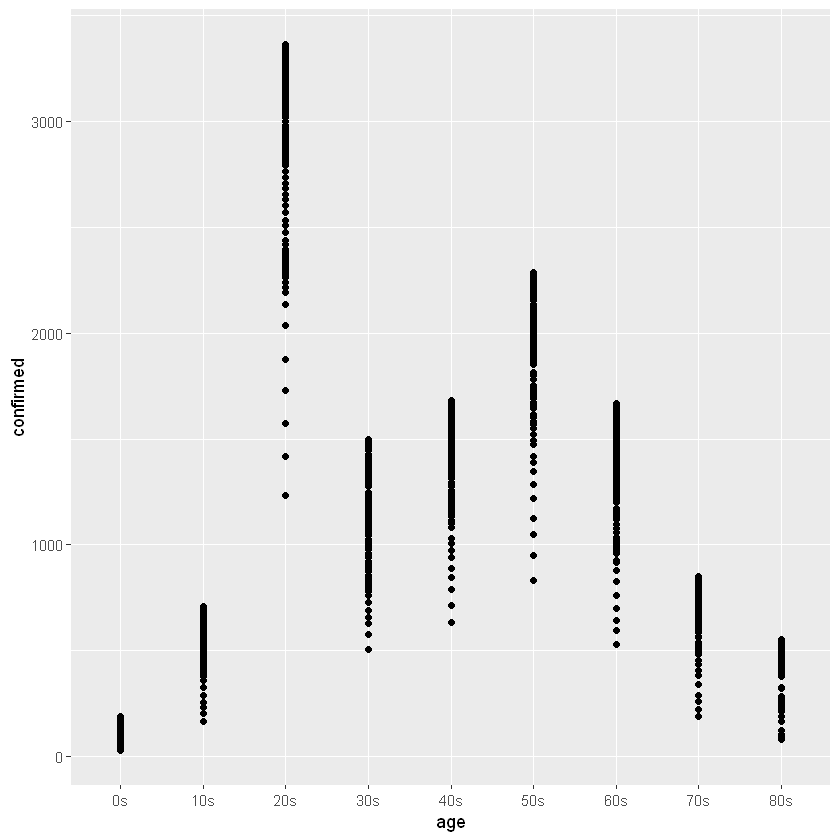

In [121]:
t_age=ggplot(TimeAge,aes(x=age,y=confirmed))+geom_point()
t_age2=t_age+scale_x_discrete(name="age")+scale_y_continuous(name="confirmed")
t_age2

### 확진자 성비는 여성이 좀 더 높습니다.

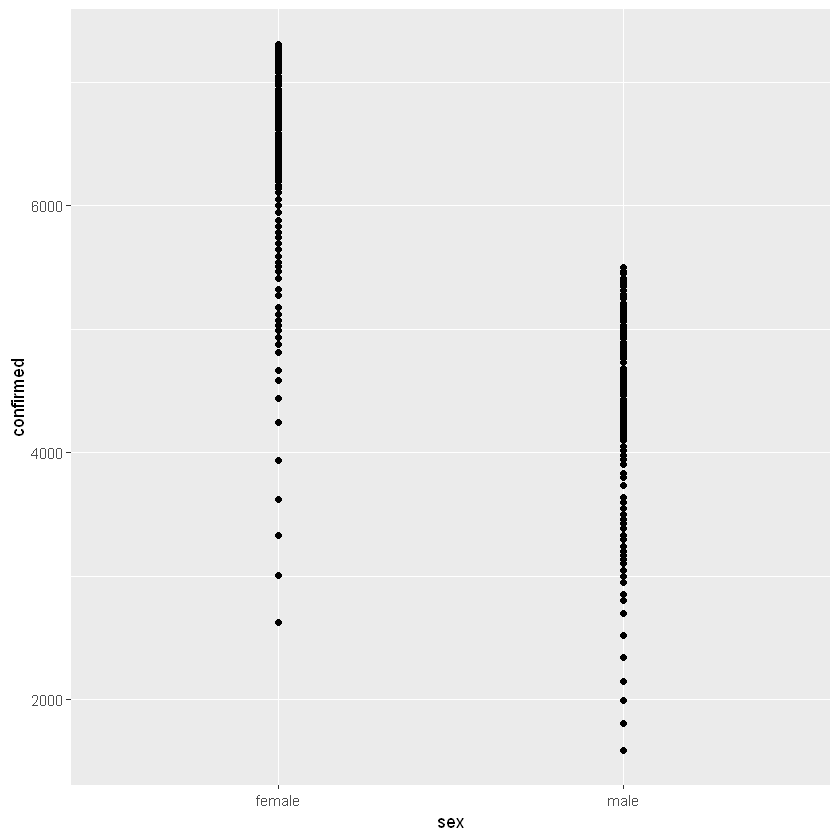

In [123]:
t_gender=ggplot(TimeGender,aes(x=sex,y=confirmed))+geom_point()
t_gender2=t_gender+scale_x_discrete(name="sex")+scale_y_continuous(name="confirmed")
t_gender2

### 확진자들의 지역 분포는 대구가 압도적으로 많고, 그 다음 경북, 서울, 경기, 인천 순입니다.

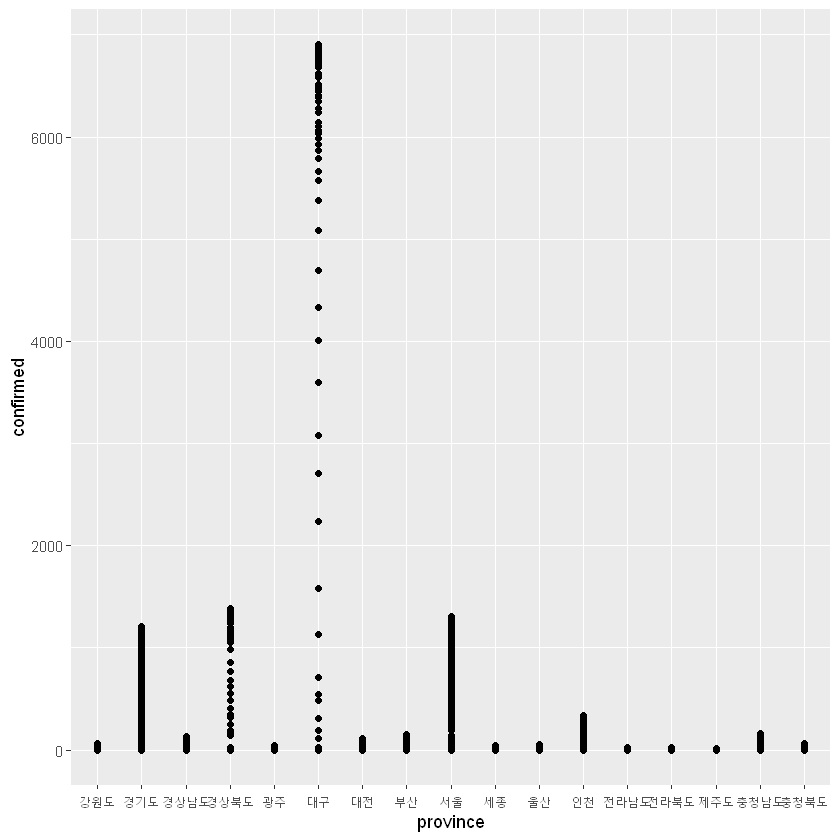

In [124]:
t_prov=ggplot(TimeProvince,aes(x=province,y=confirmed))+geom_point()
t_prov2=t_prov+scale_x_discrete(name="province")+scale_y_continuous(name="confirmed")
t_prov2

### Case 데이터로 확인했을 때도 같은 결과입니다.

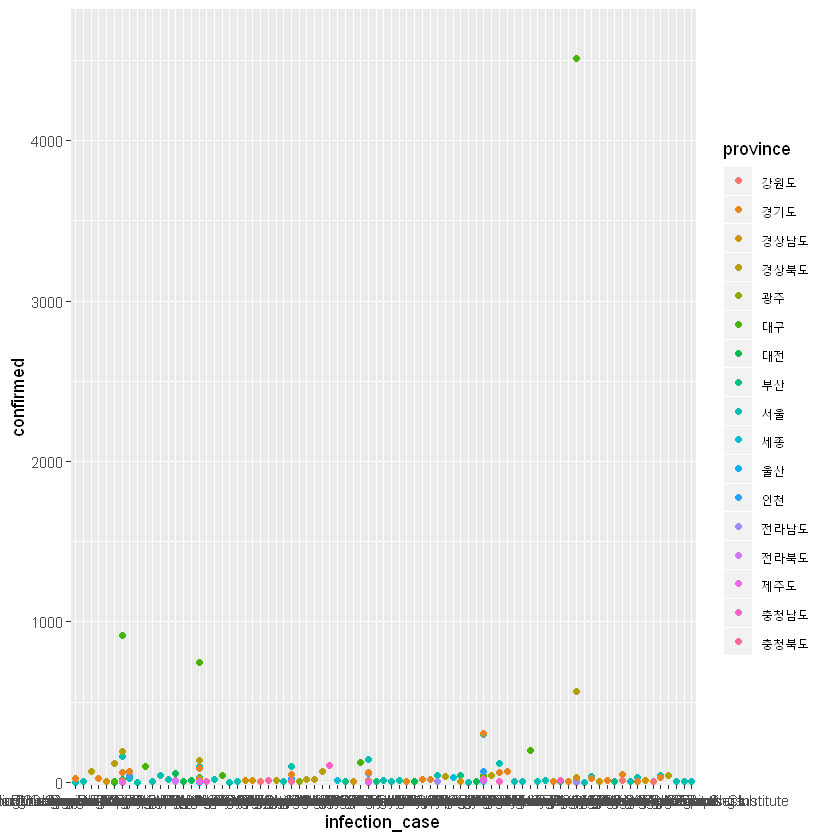

In [159]:
c_cnfrm=ggplot(Case,aes(x=infection_case,y=confirmed,color=province))+geom_point()+coord_cartesian(ylim = c(200:4600))
c_cnfrm2=c_cnfrm+scale_x_discrete(name="infection_case")+scale_y_continuous(name="confirmed")
c_cnfrm2

### 확진자 수에 따른 미용 품목의 소비량은 확진자가 늘어감에 따라 감소하였다가 다시 크게 증가하는 추세를 보입니다.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 8 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 8 rows containing missing values (geom_point)."

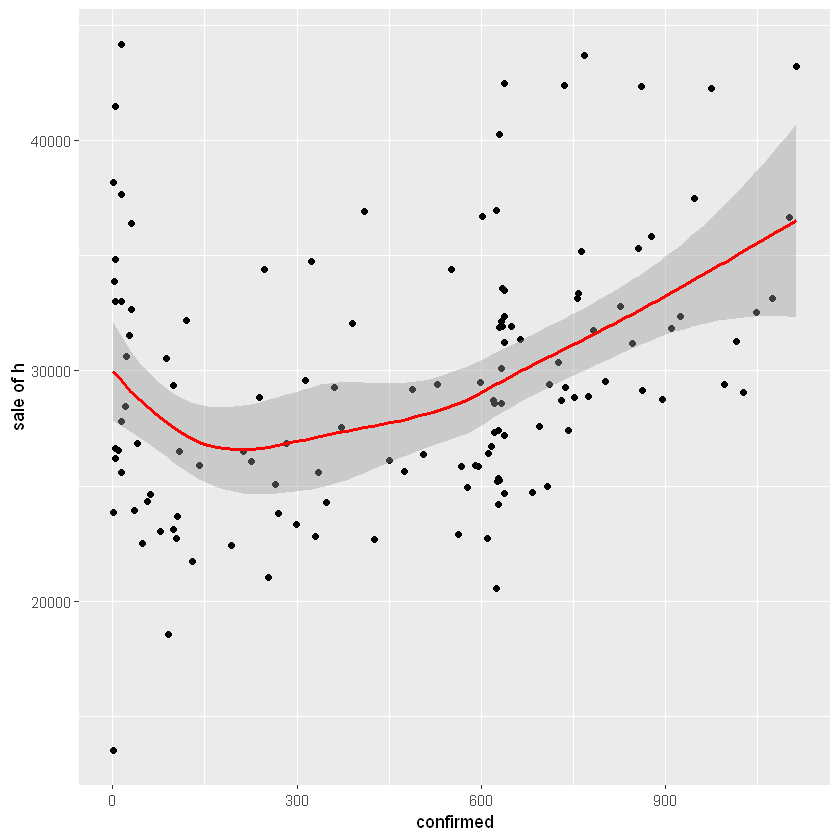

In [24]:
cor=ggplot(cor_h,aes(x=confirmed,y=selng_cascnt))+geom_point()+geom_smooth(color="red")
cor_2=cor+scale_x_continuous(name="confirmed")+scale_y_continuous(name="sale of h")
cor_2

### 확진자 수에 따른 의료 품목의 소비량은 확진자가 늘어감에 따라 감소하였다가 다시 증가하는 추세를 보입니다. 
### 미용 품목보다는 감소 및 증가 폭이 작습니다.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


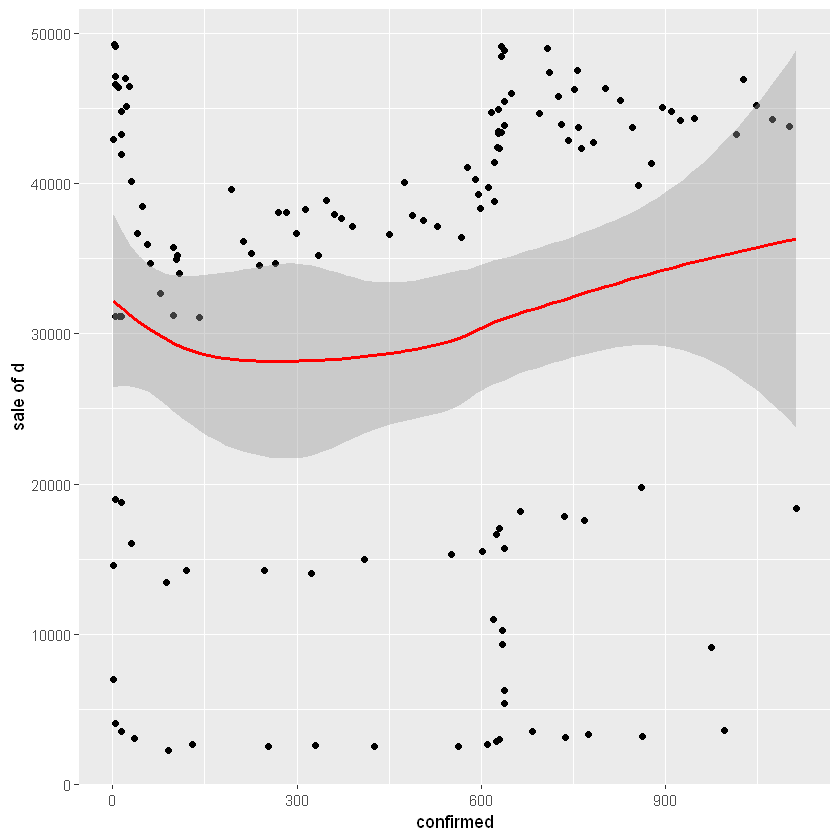

In [25]:
cord=ggplot(cor_h,aes(x=confirmed,y=selng_cascnt_d))+geom_point()+geom_smooth(color="red")
cord_2=cord+scale_x_continuous(name="confirmed")+scale_y_continuous(name="sale of d")
cord_2

### 확진자 수에 따른 음식 품목의 소비량은 확진자가 늘어감에 따라 감소하였다가 증가한 후 다시 감소하는 싸인 곡선 형태의 추세를 보입니다.
### 다만 확진자가 많아질수록 점차 증가하다가 후반부에 정체된 현상이 반영된 것으로 보입니다.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


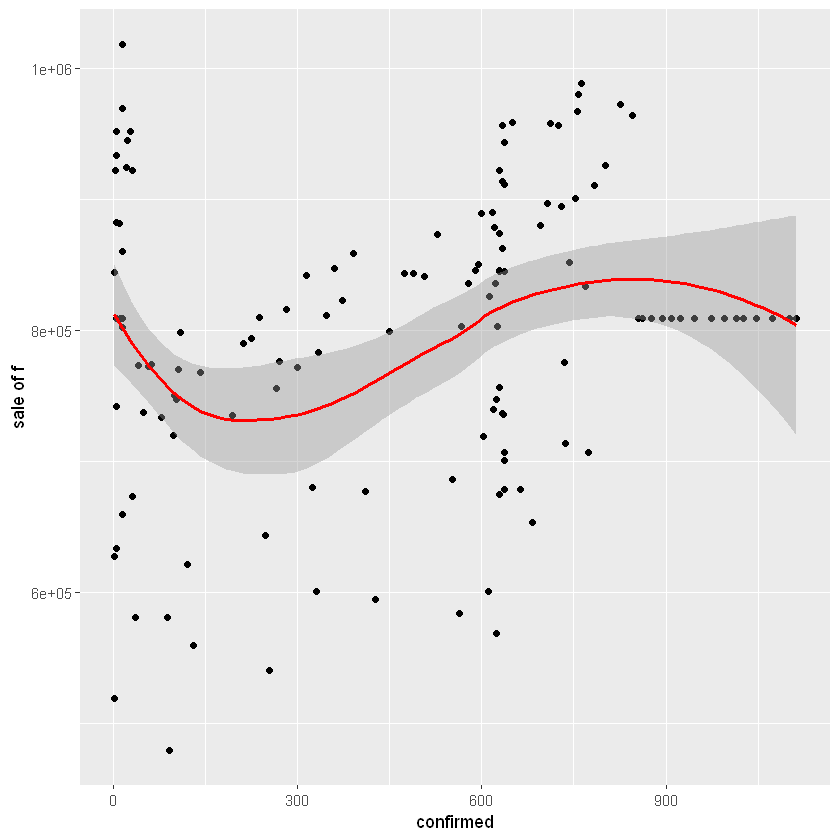

In [26]:
corf=ggplot(cor_h,aes(x=confirmed,y=selng_cascnt_f))+geom_point()+geom_smooth(color="red")
corf_2=corf+scale_x_continuous(name="confirmed")+scale_y_continuous(name="sale of f")
corf_2

### 확진자 수에 따른  학원/취미 품목의 소비량은 확진자가 늘어감에 따라 감소하였다가 증가한 후 다시 감소하는 싸인 곡선 형태의 추세를 보입니다. 
### 다만 데이터를 전체적으로 봤을 때는 소폭의 증가 추세를 나타냅니다.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


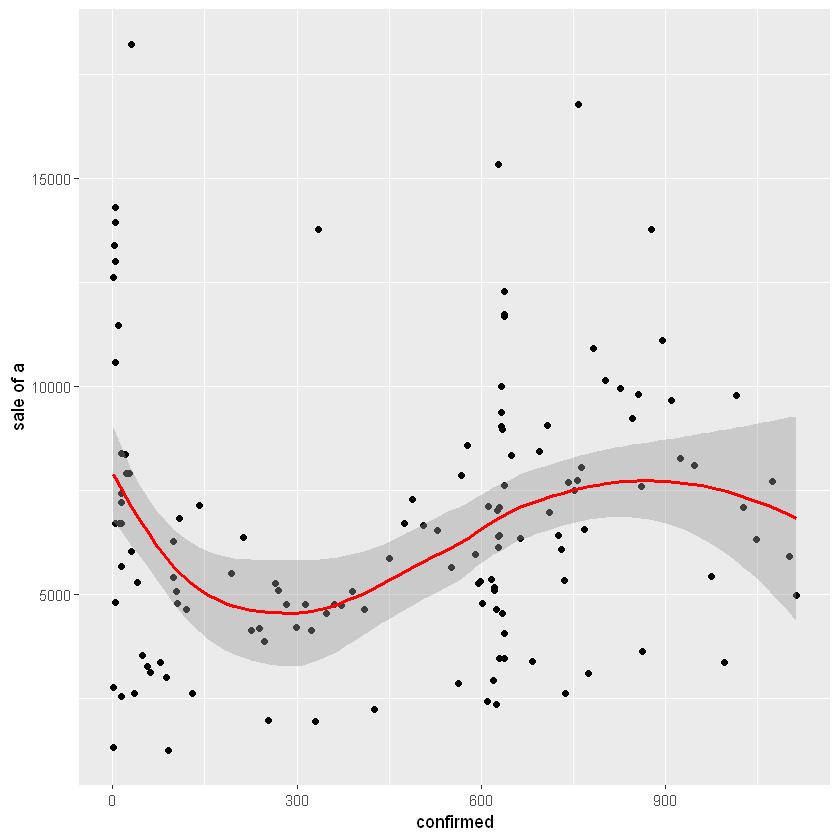

In [32]:
cora=ggplot(cor_h,aes(x=confirmed,y=selng_cascnt_a))+geom_point()+geom_smooth(color="red")
cora_2=cora+scale_x_continuous(name="confirmed")+scale_y_continuous(name="sale of a")
cora_2

## 자연어 처리를 통한 WordCloud 시각화

### 높은 확진자 수를 가진 그룹인 20대 여성을 중심으로 소비 패턴을 분석하기 위해, 2020년 1월부터 6월까지 품목별로 포털 사이트의 쇼핑 검색어들을 조사하였습니다.

### 미용 품목의 경우 샴푸, 닥터지, 크림, 클렌징 등의 항목들이 눈에 띄는 모습입니다.

In [155]:
txt<-readLines("미용검색2.txt")

In [156]:
head(txt)

[1] "바디 클렌저"       "르누베르 아이크림" "르누베르 수분크림"
[4] "샴푸"              "블랙샷 미백 크림"  "선크림"

In [157]:
txt<-str_replace_all(txt, "\\W", " ")

In [158]:
#명사추출
nouns <- extractNoun(txt)
#추출한 명사 list를 문자열 벡터로 변환, 단어별 빈도표 생성
wordcount <-table(unlist(nouns))
#데이터 프레임으로 변환
df_word <-as.data.frame(wordcount, stringsAsFactors = F)

Warning message in value[[3L]](cond):
"can't processing '바디 클렌저'."Warning message in value[[3L]](cond):
"can't processing '르누베르 아이크림'."Warning message in value[[3L]](cond):
"can't processing '르누베르 수분크림'."Warning message in value[[3L]](cond):
"can't processing '샴푸'."Warning message in value[[3L]](cond):
"can't processing '블랙샷 미백 크림'."Warning message in value[[3L]](cond):
"can't processing '선크림'."Warning message in value[[3L]](cond):
"can't processing '트리트먼트'."Warning message in value[[3L]](cond):
"can't processing '포마드'."Warning message in value[[3L]](cond):
"can't processing '르누베르 에센스'."Warning message in value[[3L]](cond):
"can't processing '클렌징 오일'."Warning message in value[[3L]](cond):
"can't processing 'ts 샴푸'."Warning message in value[[3L]](cond):
"can't processing '천연 샴푸'."Warning message in value[[3L]](cond):
"can't processing '탈모 샴푸'."Warning message in value[[3L]](cond):
"can't processing '헤어 스프레이'."Warning message in value[[3L]](cond):
"can't processing '마스크팩'."Warning messag

In [159]:
#변수명 수정
df_word <- rename(df_word, 
                  word = Var1,
                  freq = Freq)
# 두 글자 이상 단어 추출
df_word<-filter(df_word, nchar(word)>=2)

In [160]:
top_20<-df_word%>%
  arrange(desc(freq))%>%
  head(20)

### 미용 부문에서 가장 인기 있던 검색어들을 Wordcloud를 통해 나타내 본 결과는 다음과 같습니다.

#### R studio에서는 파일 리딩에 문제가 없었으나 Jupyter notebook으로 옮기는 과정에서 긴 경고문이 생겨난 점 양해 부탁드립니다.

Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 3, :
"바이오더마 클렌징 워터 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 3, :
"설화수 자음2종 기초세트 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 3, :
"실크테라피 헤어 에센스 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 3, :
"아론 염색약 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 3, :
"아론 트리트먼트 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 3, :
"아모스컬링 에센스2x could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 3, :
"아이깨끗해 cou

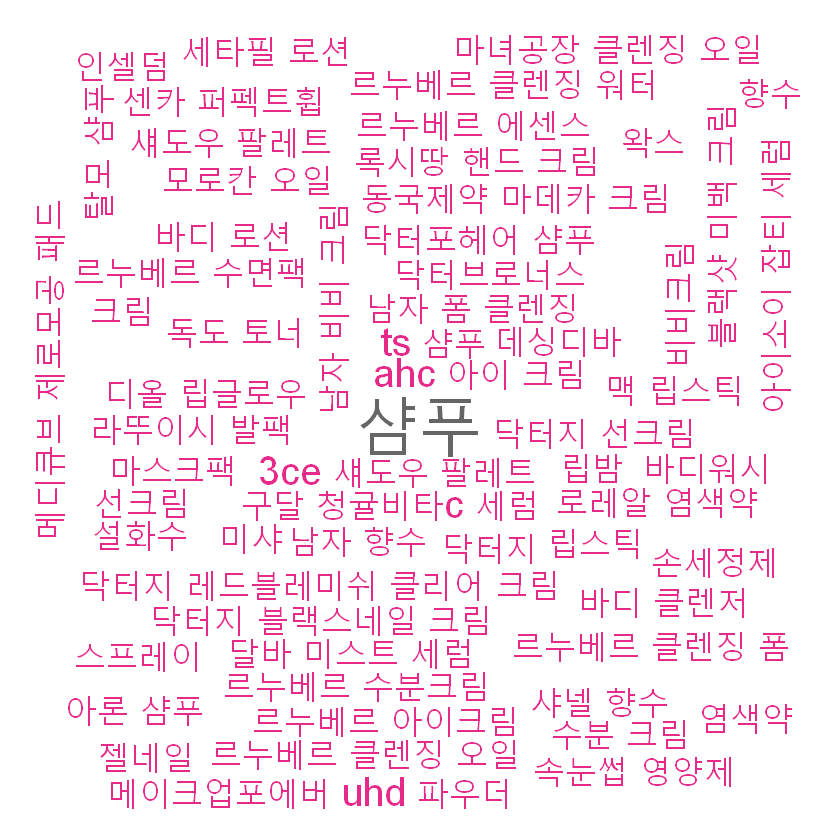

In [164]:
#Dark2 색상 목록에서 8개 색상 추출
pal<-brewer.pal(8, "Dark2")
#난수 고정
set.seed(1234)
wordcloud(words = df_word$word,
          freq = df_word$freq,
          min.freq=3,
          max.words=200,
          random.order = F,
          rot.per = .1,
          scale = c(4,0,3),
          colors = pal)

### 취미 / 학원 품목의 경우 다양한 주제들의 검색어들이 분포되어 있었습니다.

In [146]:
txt2<-readLines("취미검색.txt")

In [147]:
head(txt2)

[1] "전수환 경영학"   "화상 영어"       "콩 영어"         "롤 rp"          
[5] "지한송 재무관리" "전화 영어"

In [148]:
txt2<-str_replace_all(txt2, "\\W", " ")

In [149]:
#명사추출
nouns <- extractNoun(txt2)
#추출한 명사 list를 문자열 벡터로 변환, 단어별 빈도표 생성
wordcount <-table(unlist(nouns))
#데이터 프레임으로 변환
df_word <-as.data.frame(wordcount, stringsAsFactors = F)

Warning message in value[[3L]](cond):
"can't processing '전수환 경영학'."Warning message in value[[3L]](cond):
"can't processing '화상 영어'."Warning message in value[[3L]](cond):
"can't processing '콩 영어'."Warning message in value[[3L]](cond):
"can't processing '롤 rp'."Warning message in value[[3L]](cond):
"can't processing '지한송 재무관리'."Warning message in value[[3L]](cond):
"can't processing '전화 영어'."Warning message in value[[3L]](cond):
"can't processing '카톡 타로'."Warning message in value[[3L]](cond):
"can't processing '황정빈 경제학'."Warning message in value[[3L]](cond):
"can't processing '조이 영어'."Warning message in value[[3L]](cond):
"can't processing '어린이 화상 영어'."Warning message in value[[3L]](cond):
"can't processing '메이크업 레슨'."Warning message in value[[3L]](cond):
"can't processing '과학샘'."Warning message in value[[3L]](cond):
"can't processing '원어민 화상 영어'."Warning message in value[[3L]](cond):
"can't processing '전수환 프리패스'."Warning message in value[[3L]](cond):
"can't processing '전화 타로'."Warning m

In [150]:
df_word <- rename(df_word, 
                  word = Var1,
                  freq = Freq)
# 두 글자 이상 단어 추출
df_word<-filter(df_word, nchar(word)>=2)

In [151]:
top_20<-df_word%>%
  arrange(desc(freq))%>%
  head(20)

Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"네이버 스마트 스토어 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"라즈키즈 화상 영어 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"라탄 원데이 클래스 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"라탄공예 원데이 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"로봇 개스팟 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"롤 rp 상품권 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"리그오브레전드 rp could n

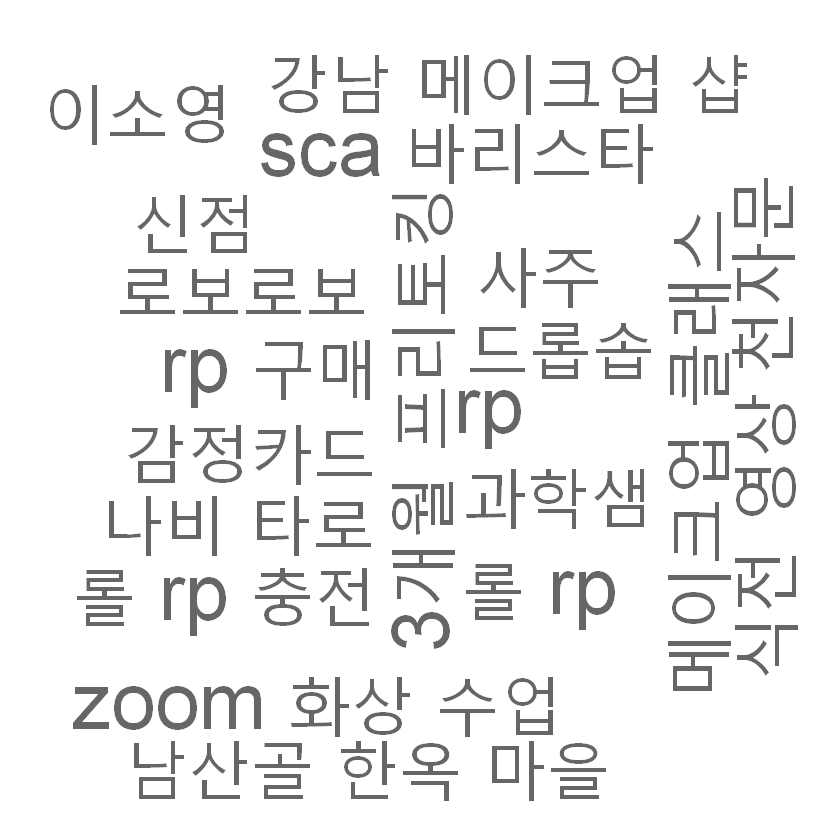

In [154]:
#Dark2 색상 목록에서 8개 색상 추출
pal<-brewer.pal(8, "Dark2")
#난수 고정
set.seed(1234)
wordcloud(words = df_word$word,
          freq = df_word$freq,
          min.freq=2,
          max.words=200,
          random.order = F,
          rot.per = .1,
          scale = c(4,0,3),
          colors = pal)

### 음식 품목의 경우 비타민, 각종 음식 상품 명들이 골고루 분포되어 있었습니다.

In [167]:
txt3<-readLines("음식검색.txt")

Warning message in readLines("음식검색.txt"):
"'<ec>쓬<ec>떇寃<ec>깋.txt'에서 불완전한 마지막 행이 발견되었습니다"

In [168]:
head(txt3)

[1] "오메가 3"             "비타민 d"             "크릴 오일"           
[4] "프로바이오틱스"       "프리바이오틱스"       "네이처드림 크릴 오일"

In [169]:
txt3<-str_replace_all(txt3, "\\W", " ")

In [170]:
#명사추출
nouns <- extractNoun(txt3)
#추출한 명사 list를 문자열 벡터로 변환, 단어별 빈도표 생성
wordcount <-table(unlist(nouns))
#데이터 프레임으로 변환
df_word <-as.data.frame(wordcount, stringsAsFactors = F)

Warning message in value[[3L]](cond):
"can't processing '오메가 3'."Warning message in value[[3L]](cond):
"can't processing '비타민 d'."Warning message in value[[3L]](cond):
"can't processing '크릴 오일'."Warning message in value[[3L]](cond):
"can't processing '프로바이오틱스'."Warning message in value[[3L]](cond):
"can't processing '프리바이오틱스'."Warning message in value[[3L]](cond):
"can't processing '네이처드림 크릴 오일'."Warning message in value[[3L]](cond):
"can't processing '멀티 비타민'."Warning message in value[[3L]](cond):
"can't processing '닭가슴살'."Warning message in value[[3L]](cond):
"can't processing '밀크씨슬'."Warning message in value[[3L]](cond):
"can't processing '히알루론산'."Warning message in value[[3L]](cond):
"can't processing '꽃송이 버섯'."Warning message in value[[3L]](cond):
"can't processing '유산균'."Warning message in value[[3L]](cond):
"can't processing '루테인'."Warning message in value[[3L]](cond):
"can't processing '정관장 에브리타임'."Warning message in value[[3L]](cond):
"can't processing '일리 캡슐'."Warning message

In [171]:
df_word <- rename(df_word, 
                  word = Var1,
                  freq = Freq)
# 두 글자 이상 단어 추출
df_word<-filter(df_word, nchar(word)>=2)

In [172]:
top_20<-df_word%>%
  arrange(desc(freq))%>%
  head(20)

Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"네스프레소 캡슐 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"네이처드림 남극 크릴 오일 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"네이처드림 크릴 오일 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"다이어트 도시락 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"닥터스베스트 멀티 비타민 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"단백질 보충제 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"단백질 쉐이크 co

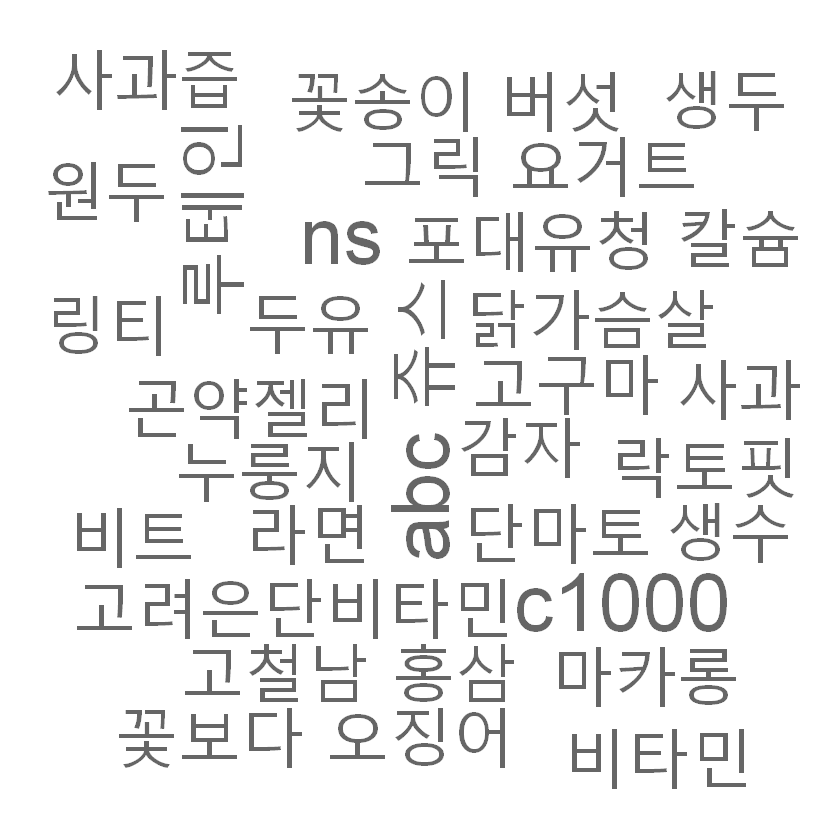

In [173]:
#Dark2 색상 목록에서 8개 색상 추출
pal<-brewer.pal(8, "Dark2")
#난수 고정
set.seed(1234)
wordcloud(words = df_word$word,
          freq = df_word$freq,
          min.freq=2,
          max.words=200,
          random.order = F,
          rot.per = .1,
          scale = c(4,0,3),
          colors = pal)

In [174]:
txt4<-readLines("건강검색.txt")

Warning message in readLines("건강검색.txt"):
"'嫄닿컯寃<ec>깋.txt'에서 불완전한 마지막 행이 발견되었습니다"

### 건강 / 의료 품목의 경우 마스크에 관련된 검색어들만 존재하여 코로나 사태의 모습을 잘 나타내는 모습을 보였습니다.

In [175]:
head(txt4)

[1] "마스크"               "kf94 마스크"          "미세먼지 마스크 kf94"
[4] "일회용 마스크"        "덴탈 마스크"          "일회용 마스크 50매"

In [176]:
txt4<-str_replace_all(txt4, "\\W", " ")

In [177]:
#명사추출
nouns <- extractNoun(txt4)
#추출한 명사 list를 문자열 벡터로 변환, 단어별 빈도표 생성
wordcount <-table(unlist(nouns))
#데이터 프레임으로 변환
df_word <-as.data.frame(wordcount, stringsAsFactors = F)

Warning message in value[[3L]](cond):
"can't processing '마스크'."Warning message in value[[3L]](cond):
"can't processing 'kf94 마스크'."Warning message in value[[3L]](cond):
"can't processing '미세먼지 마스크 kf94'."Warning message in value[[3L]](cond):
"can't processing '일회용 마스크'."Warning message in value[[3L]](cond):
"can't processing '덴탈 마스크'."Warning message in value[[3L]](cond):
"can't processing '일회용 마스크 50매'."Warning message in value[[3L]](cond):
"can't processing 'kf94'."Warning message in value[[3L]](cond):
"can't processing '미세먼지 마스크 kf80'."Warning message in value[[3L]](cond):
"can't processing '코로나 19'."Warning message in value[[3L]](cond):
"can't processing 'kf80 마스크'."Warning message in value[[3L]](cond):
"can't processing '면 마스크'."Warning message in value[[3L]](cond):
"can't processing '마스크 kf94'."Warning message in value[[3L]](cond):
"can't processing '웰킵스 마스크'."Warning message in value[[3L]](cond):
"can't processing '유한킴벌리 덴탈 마스크'."Warning message in value[[3L]](cond):
"can't proc

In [178]:
df_word <- rename(df_word, 
                  word = Var1,
                  freq = Freq)
# 두 글자 이상 단어 추출
df_word<-filter(df_word, nchar(word)>=2)

In [179]:
top_20<-df_word%>%
  arrange(desc(freq))%>%
  head(20)

Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"3중필터 마스크 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"kf 마스크 대형 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"kf80 마스크 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"kf94 대형 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"kf94 마스크 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"kf94 마스크 100매 could not be fit on page. It will not be plotted."Warning message in wordcloud(words = df_word$word, freq = df_word$freq, min.freq = 2, :
"kf94 마스크 50매 could

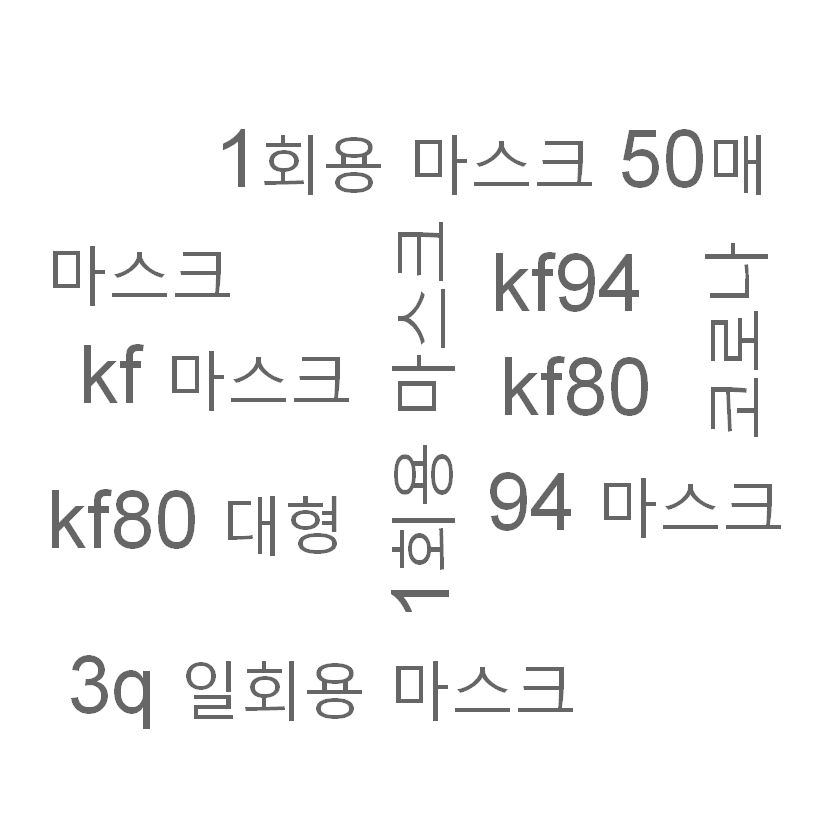

In [180]:
#Dark2 색상 목록에서 8개 색상 추출
pal<-brewer.pal(8, "Dark2")
#난수 고정
set.seed(1234)
wordcloud(words = df_word$word,
          freq = df_word$freq,
          min.freq=2,
          max.words=200,
          random.order = F,
          rot.per = .1,
          scale = c(4,0,3),
          colors = pal)

## Clustering - dendrogram, K-means 알고리즘 사용
## 지역별 확진자 수 및 소비 패턴 clustering

### Region 데이터의 factor (교육기관, 노인시설 등)를 활용한 Clustering 분류

In [106]:
x<-Region[,4:12]
dx<-round(dist(x), digits=2)
D2<-dist(x, method="euclidian")
hc1<-hclust(dist(x)^2, method="complete")

### city 항목에 대해 euclidian distance를 활용하여 complete linkage method의 hierarchical clustering을 한 결과 다음과 같이 241개의 변수들이 3개의 군집으로 분류 되었습니다. 
### 다만 대체로 하나의 군집으로 몰려있기 때문에 분류의 의미가 없습니다.

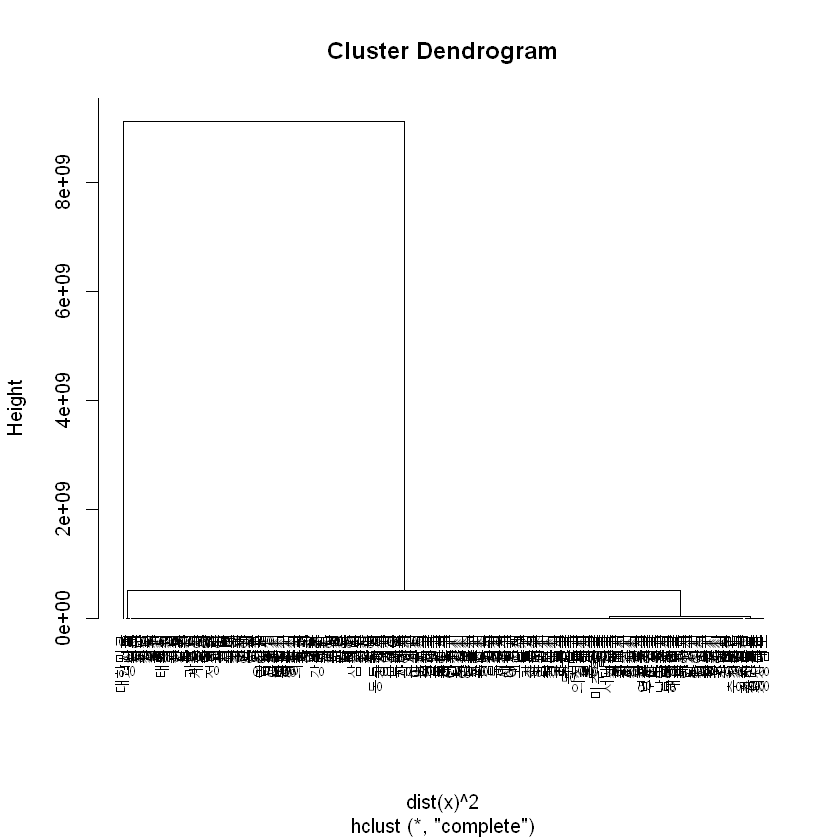

In [10]:
plot(hc1, labels=Region$city, hang=-1)

In [107]:
#cutree(hc1, k=3)
table(cutree(hc1, k=3))


  1   2   3 
  2 241   1 

In [108]:
data_k<-kmeans(x, centers=3)
str(data_k)
#data_k$cluster
table(data_k$cluster)
#clust<-data.frame(PC.s$scores, kmeans=factor(data_k$cluster))
clust3<-data.frame(Region, kmeans=factor(data_k$cluster))

List of 9
 $ cluster     : int [1:244] 3 1 1 1 1 1 1 1 1 1 ...
 $ centers     : num [1:3, 1:9] 36.4 37.6 37.4 127.7 127 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:9] "latitude" "longitude" "elementary_school_count" "kindergarten_count" ...
 $ totss       : num 1e+10
 $ withinss    : num [1:3] 2.13e+08 0.00 3.74e+06
 $ tot.withinss: num 2.16e+08
 $ betweenss   : num 9.81e+09
 $ size        : int [1:3] 241 1 2
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"



  1   2   3 
241   1   2 

### K-means로도 Clustering한 결과 눈에 띄는 특이성이 없으며 99%가 같은 군집으로 분류됩니다. 
### 따라서 시설의 갯수는 Clustering의 요소가 되지 못합니다.

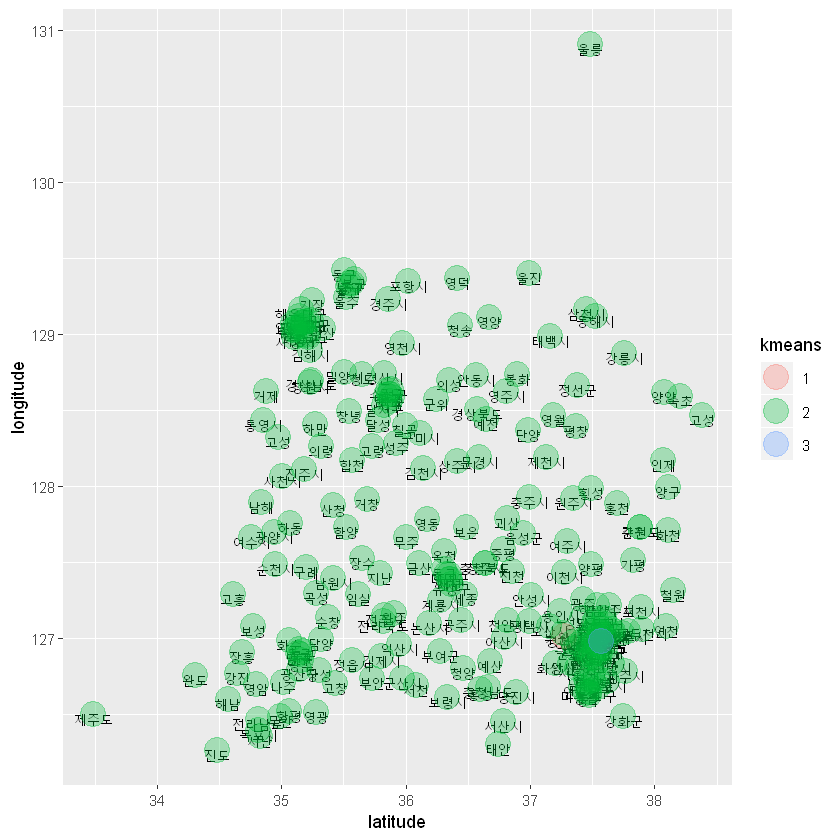

In [16]:
ggplot(clust3, aes(latitude, longitude))+geom_text(aes(label=city))+geom_point(aes(color=kmeans), size=7, alpha=0.3)

### 여담으로, 'fviz_cluster' 함수를 사용하면 일부 도시에서 특이성을 띠는 결과가 나오지만, 대부분이 하나의 군집으로 몰려있었기 때문에 큰 차이는 없었습니다.
#### jupyter notebook으로는 실행이 불가하여 결과를 첨부하지는 않았습니다.

In [ ]:
df=scale(Region[,4:12])
fviz_cluster(data_k, data = df)

In [ ]:
fviz_nbclust(df, kmeans, method = "wss") # Elbow Method

## 서울 구별 카드 소비량 Clustering

In [109]:
y<-sep[,2:8]
dy<-round(dist(y), digits=2)
D2_2<-dist(y, method="euclidian")
hc2<-hclust(dist(y)^2, method="complete")

### 구에 대해 euclidian distance를 활용하여 complete linkage method의 hierarchical clustering을 한 결과 다음과 같이 25개의 변수들이 3개의 군집으로 분류되었습니다. 
### 다만 cluster 3에 반 이상이 몰린 형태를 띠고 있습니다. 

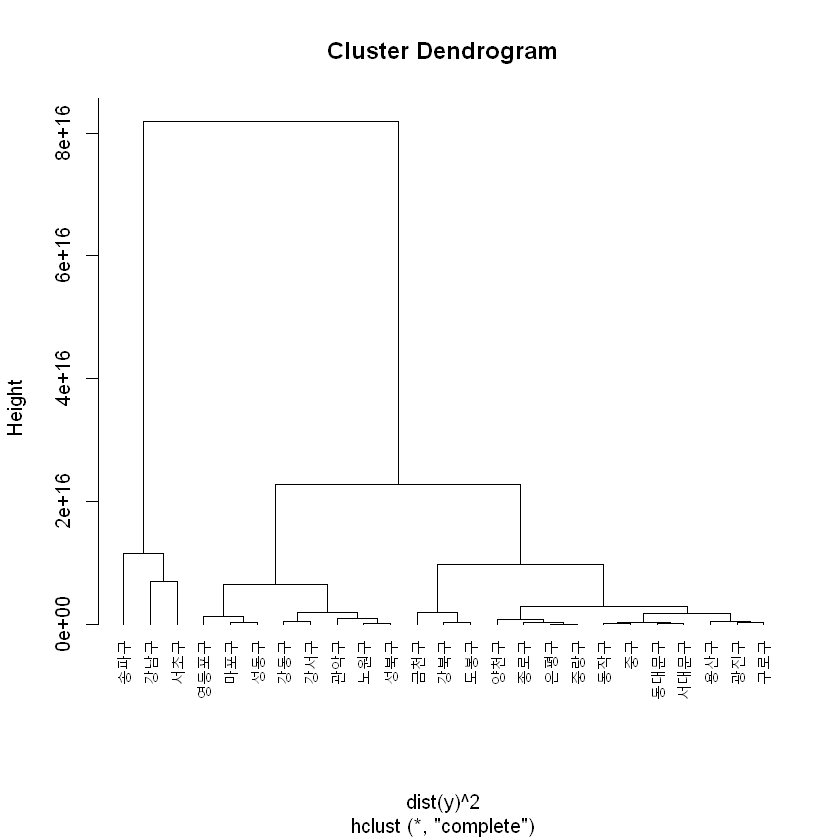

In [129]:
plot(hc2, labels=sep$gu, hang=-1) 

In [110]:
#cutree(hc2, k=3)
table(cutree(hc2, k=3))


 1  2  3 
 3  8 14 

In [111]:
data_k2<-kmeans(y, centers=3)
str(data_k2)
#data_k2$cluster
table(data_k2$cluster)
clust3_2<-data.frame(sep, kmeans=factor(data_k2$cluster))

List of 9
 $ cluster     : int [1:25] 3 1 2 1 1 2 2 2 1 2 ...
 $ centers     : num [1:3, 1:7] 7.33e+07 5.08e+07 1.28e+08 6.49e+07 4.49e+07 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:7] "01월" "02월" "03월" "04월" ...
 $ totss       : num 1.25e+17
 $ withinss    : num [1:3] 8.20e+15 1.18e+16 9.31e+15
 $ tot.withinss: num 2.94e+16
 $ betweenss   : num 9.58e+16
 $ size        : int [1:3] 9 13 3
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"



 1  2  3 
 9 13  3 

### K-means를 통해 분류하여 그래프를 그려본 결과 강남, 서초, 송파 / 관악, 강서, 영등포, 마포 / 구로, 금천, 종로 등 adstrd_code와 비례하여 clustering 된 것을 볼 수 있습니다. 
### 앞선 결과를 보시면 실제 카드 소비 순위와 비슷하게 군집이 형성되었음을 알 수 있습니다.

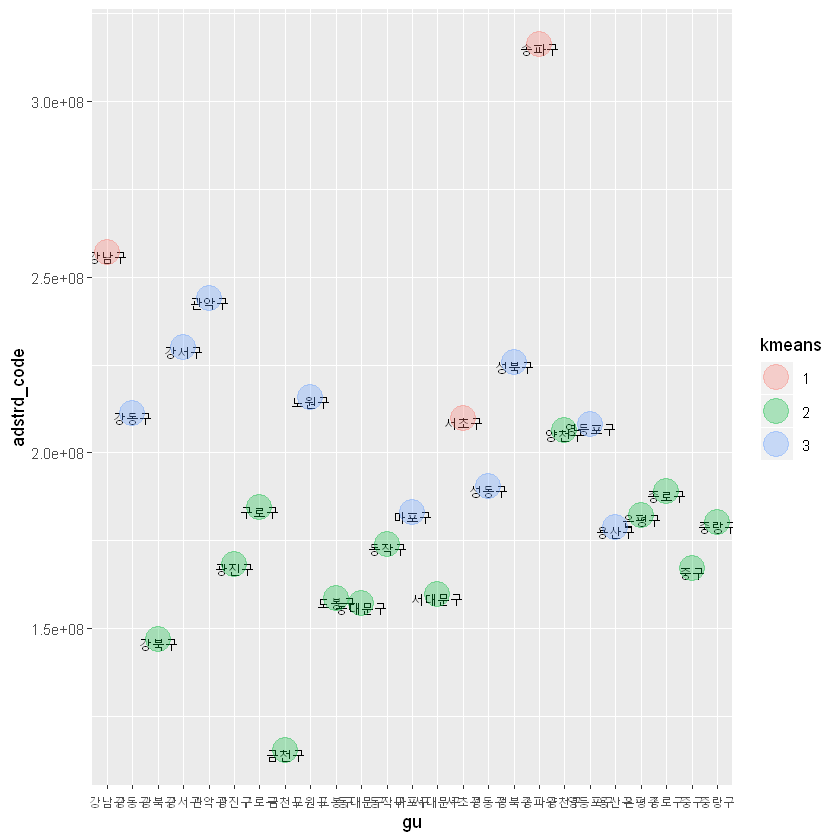

In [133]:
ggplot(clust3_2, aes(gu, adstrd_code))+geom_text(aes(label=gu))+geom_point(aes(color=kmeans), size=7, alpha=0.3)

## 시계열 ARIMA 분석 - 지금까지, 앞으로의 소비 패턴 예측
### 많은 확진자가 나온 지역 / 소비 지수가 눈에 띄는 지역의 품목별 지출액의 예측치 그래프화

### 우선, 확진자 수가 가장 많은 관악구의 소비 패턴을 예측해보고자 합니다.

In [183]:
y1=aggregate(card_g$salamt, by=list(card_g$date), FUN=sum)
head(y1)

Group.1,x
2020-01-04,473719659
2020-01-05,402593106
2020-01-06,305190492
2020-01-07,472514628
2020-01-08,379062780
2020-01-09,392403445


#### 초반에 매우 큰 진동폭을 띠고 있으며 약간의 증가 추세 즉, 약간의 비정상성을 띠고 있음 -> 차분 필요

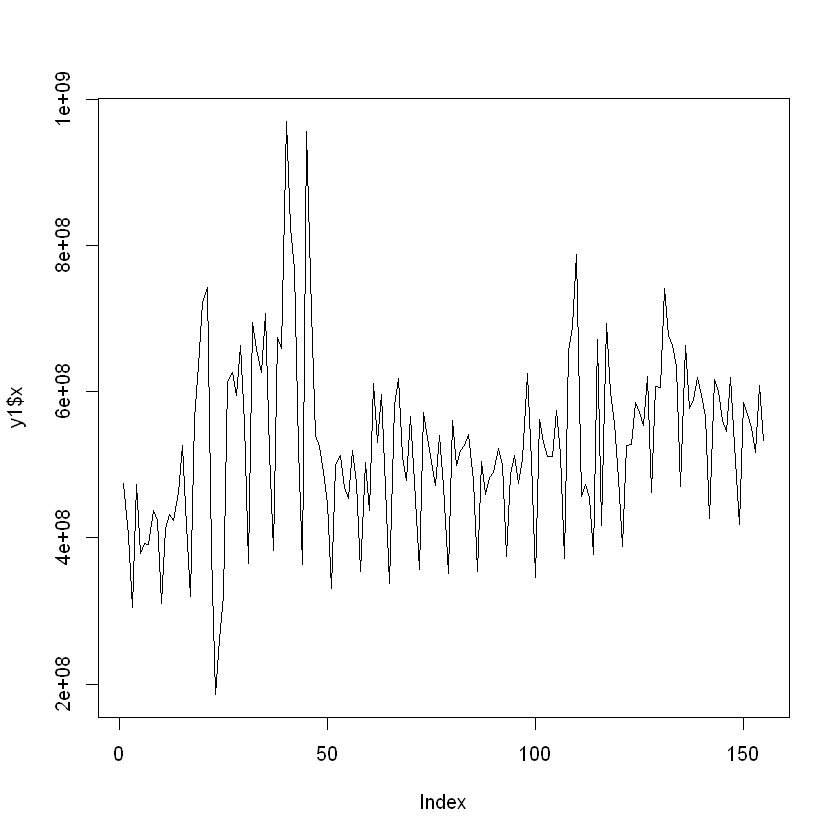

In [82]:
plot(y1$x, type="l")

#### 차분 후 비정상성이 완전히 사라진 것을 볼 수 있습니다.

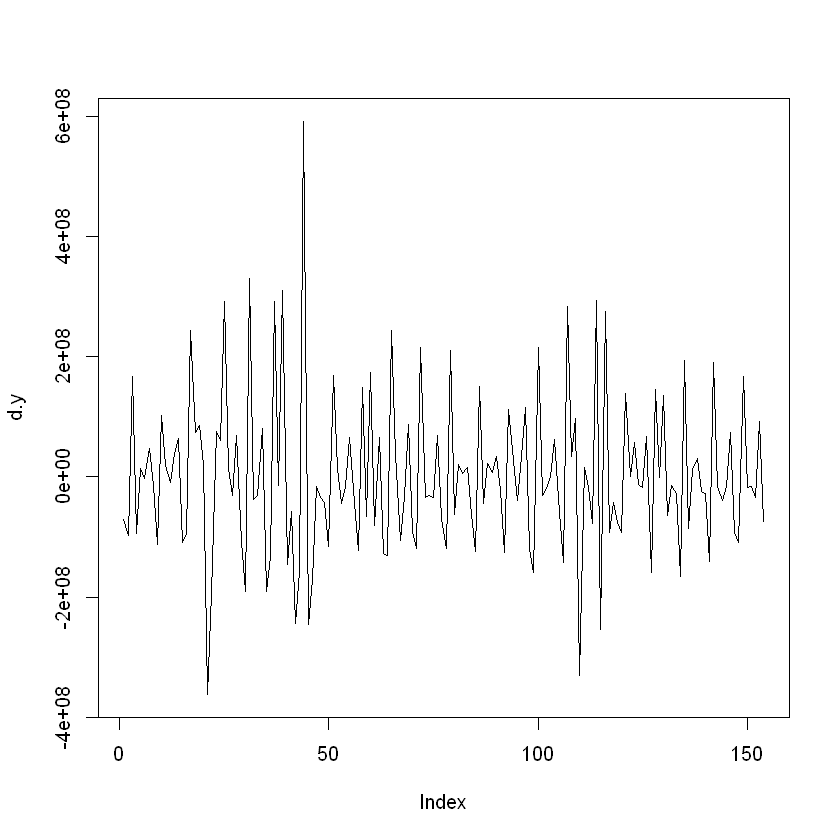

In [186]:
nd = length(y1$x)
d.y = y1$x[2:nd]-y1$x[1:(nd-1)]
plot(d.y, type="l")

#### ACF 그래프를 확인해보면 7마다 주기를 갖는 강한 자기 상관이 나타남
#### 7일 마다 비슷한 패턴이 반복되는 계절성 시계열이므로 계절 차분이 필요합니다.

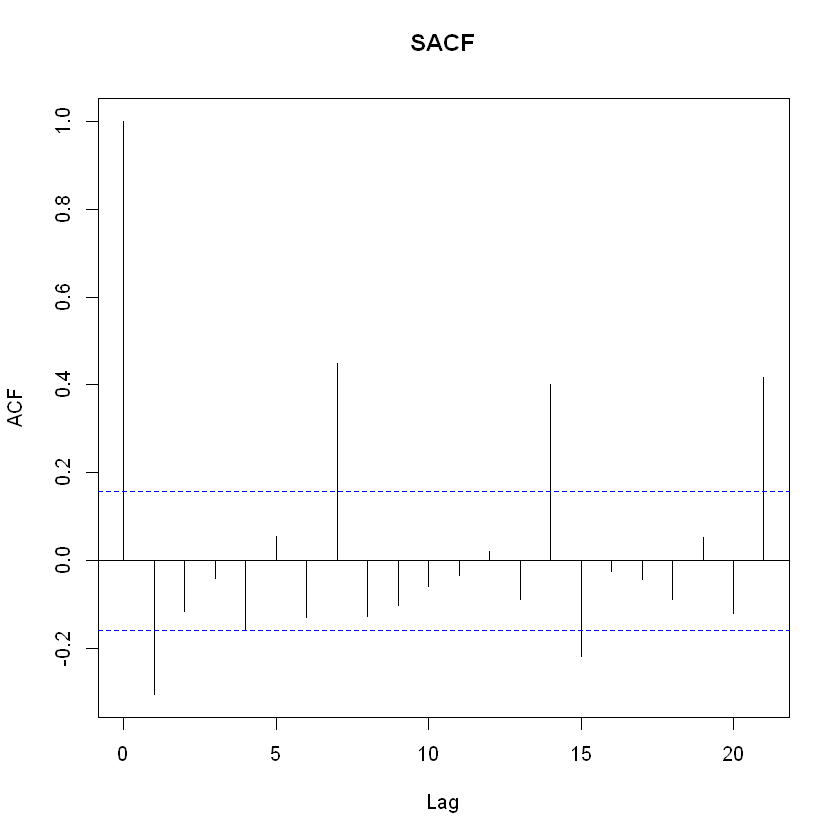

In [187]:
acf(d.y, main = "SACF")

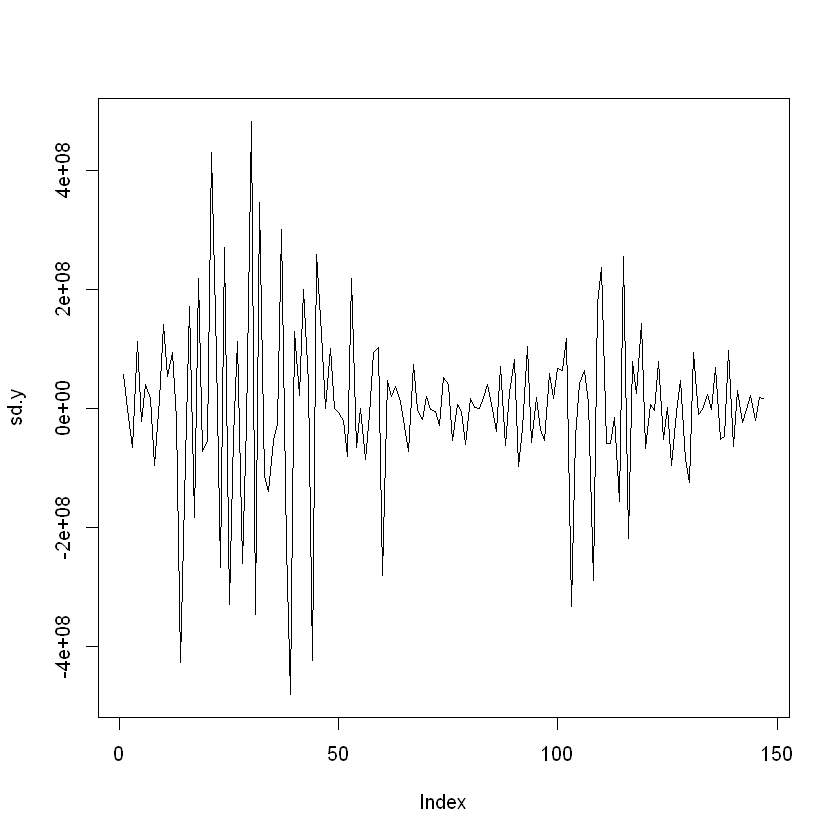

In [188]:
nd = length(d.y)
sd.y = d.y[8:nd]-d.y[1:(nd-7)]
plot(sd.y, type="l")

#### 계절 차분 후 7의 주기마다 나타나던 강한 자기상관이 사라진 것을 볼 수 있습니다.

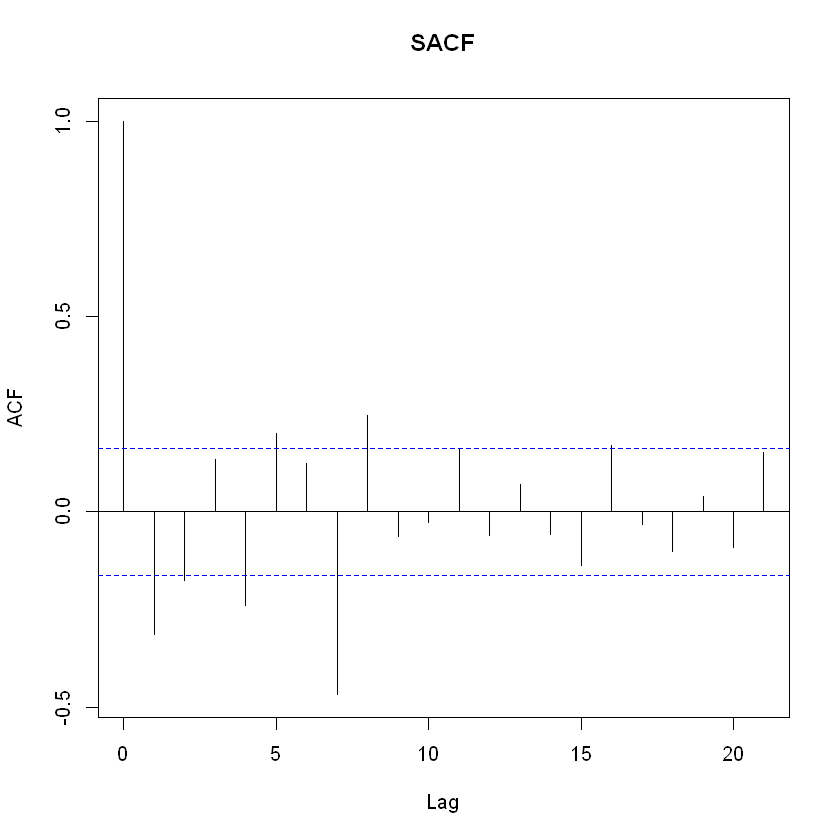

In [189]:
acf(sd.y, main = "SACF")

#### PACF : 극명하게 나타나진 않지만, 점차 소멸해가는 싸인함수 형태이므로 ARMA 계열임을 알 수 있습니다.

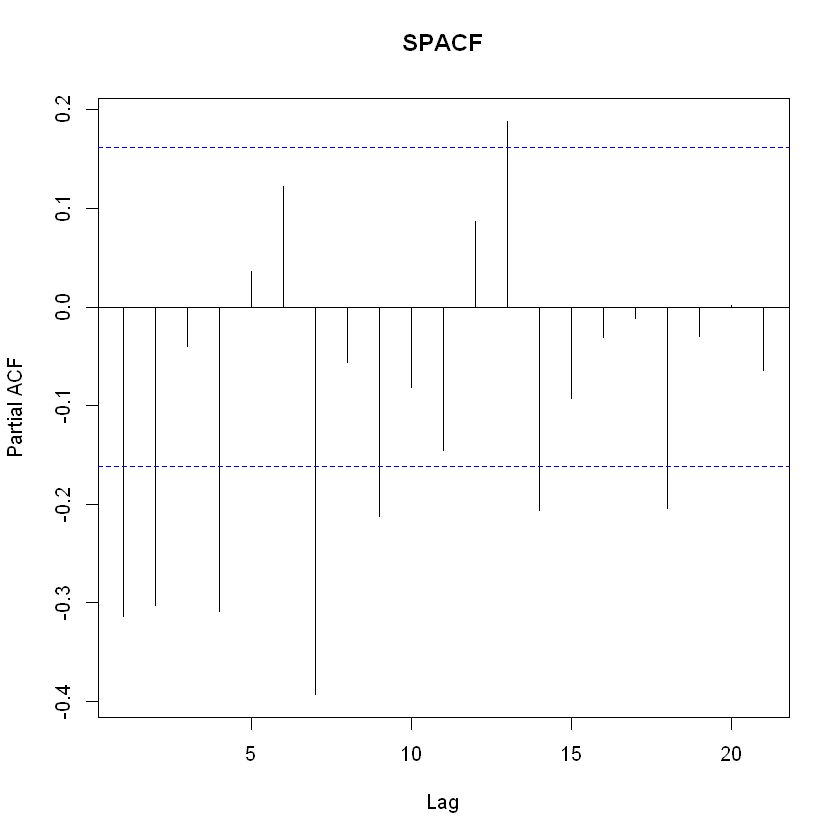

In [200]:
pacf(sd.y, main = "SPACF")

#### ARIMA 분석을 통해 bic가 최소가 되는 포인트를 찾아줍니다.

In [190]:
M=1
k=1
y_bic=c()
for(p in 0:M) {
  for (q in 0:M) {
    for (P in 0:M) {
      for (Q in 0:M) {
        fit = Arima(sd.y, order = c(p,1,q),
                    seasonal = list(order = c(P,1,Q),
                                    period = 7),
                    method = 'ML')
        y_bic[k] = fit$bic
        k=k+1
      }
    }
  }
}
which.min(y_bic)
y_bic

[1] 16

[1] 5909.889 5783.837 5837.983 5755.229 5782.983 5663.288 5716.720 5640.189
 [9] 5861.954 5738.545 5796.194 5714.571 5771.542 5654.502 5709.421 5635.098

### 모형 예측 후 forecast 함수를 통해 앞으로의 값을 예측해보면 초기값 1월 4일로부터 60 ~ 100일 이후인 약 3-5월의 소비와 비슷하게 예측되는 것을 볼 수 있습니다.

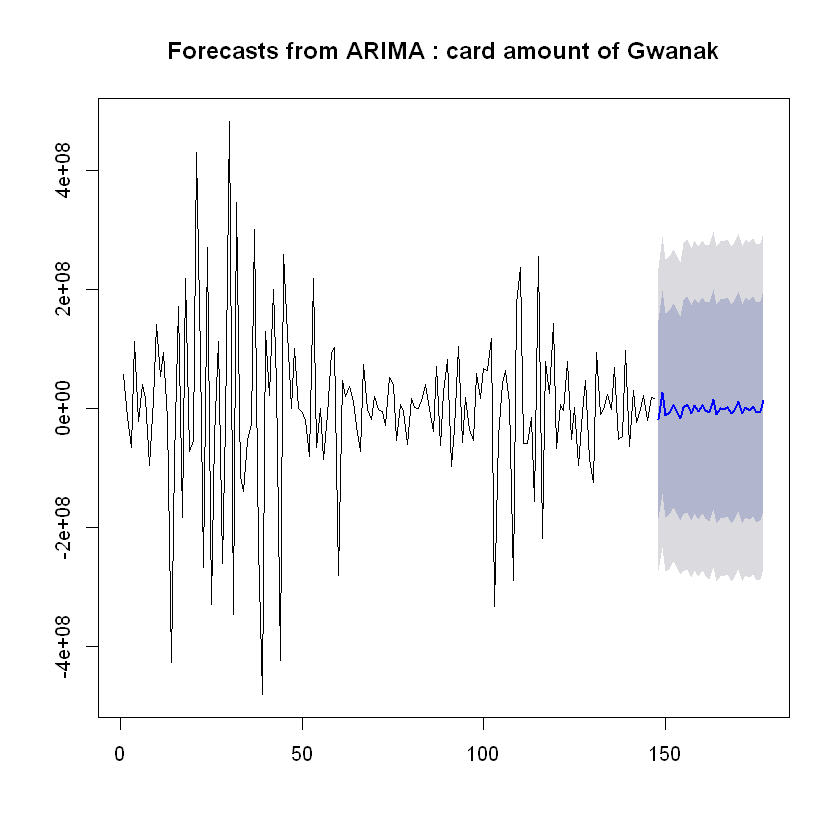

In [191]:
hat = forecast(fit, h = 30)
plot(hat,main="Forecasts from ARIMA : card amount of Gwanak")

### 다음으로는, 송파구에서 눈에 띄었던 의료 소비 패턴 예측을 진행해보았습니다.

In [51]:
d_songpa<- d_gu %>% filter(gu=='송파구')

In [52]:
y2=aggregate(d_songpa$salamt, by=list(d_songpa$date), FUN=sum)
head(y2)

Group.1,x
2020-01-04,35625370
2020-01-05,13939760
2020-01-07,34558170
2020-01-08,26948300
2020-01-09,19687290
2020-01-10,16934700


#### 일부 구간에서 매우 큰 진동폭을 띠고 있으며 비정상성을 띠고 있음 -> 차분 필요

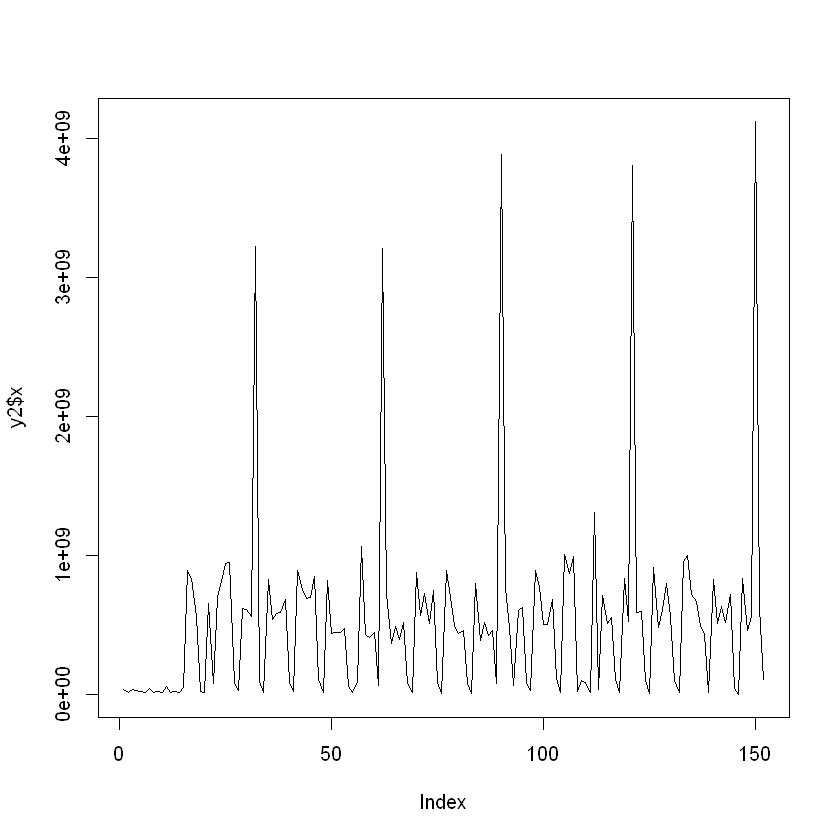

In [53]:
plot(y2$x, type="l")

#### 차분 후 비정상성이 완전히 사라진 것을 볼 수 있습니다.

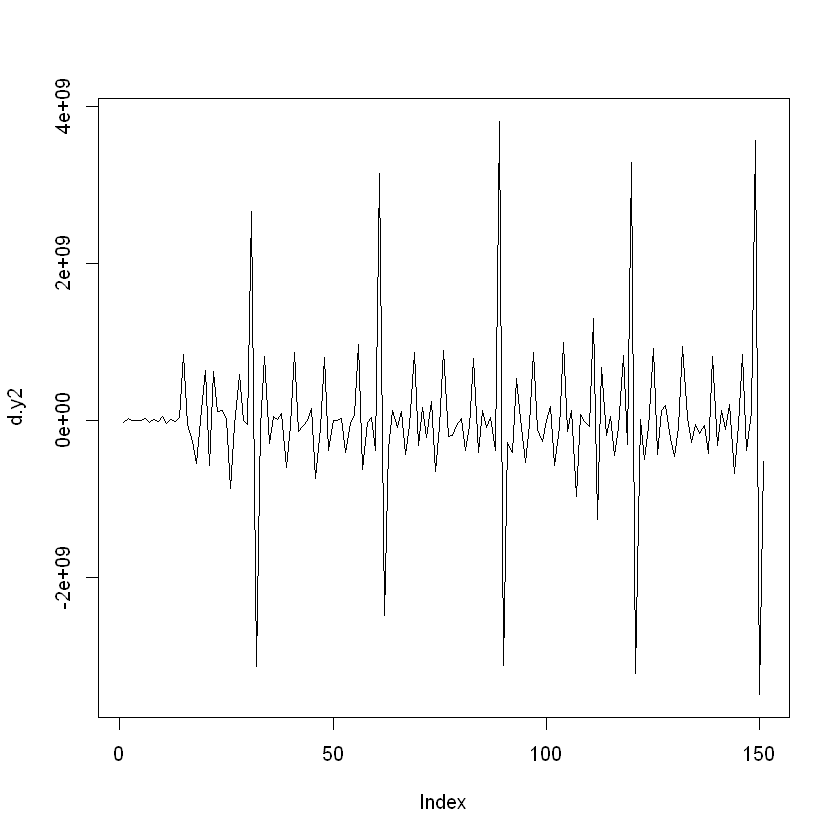

In [57]:
nd1 = length(y2$x)
d.y2 = y2$x[2:nd1]-y2$x[1:(nd1-1)]
plot(d.y2, type="l")

#### ACF 그래프를 확인해보면 시차 2부터 소멸해가는 형태를 띠고 있으므로 앞선 분석과는 달리 계절성 시계열이 아닙니다. 
#### 따라서 계절 차분의 필요성이 없습니다.

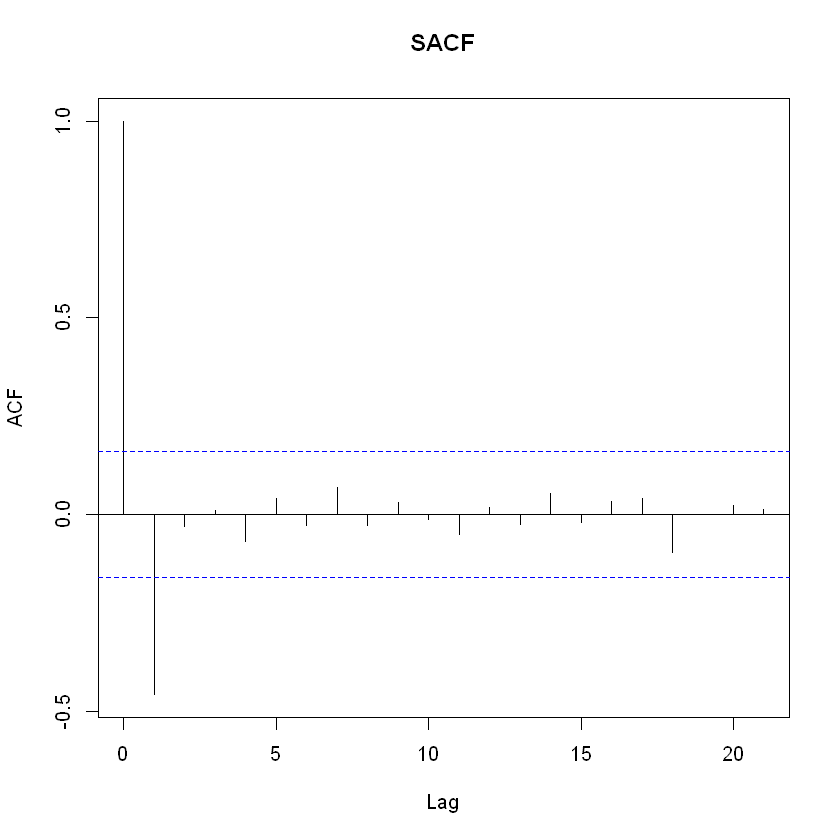

In [58]:
acf(d.y2, main = "SACF")

#### PACF 또한 소멸해가는 싸인 함수 형태이므로 ARMA 모형 시계열입니다.

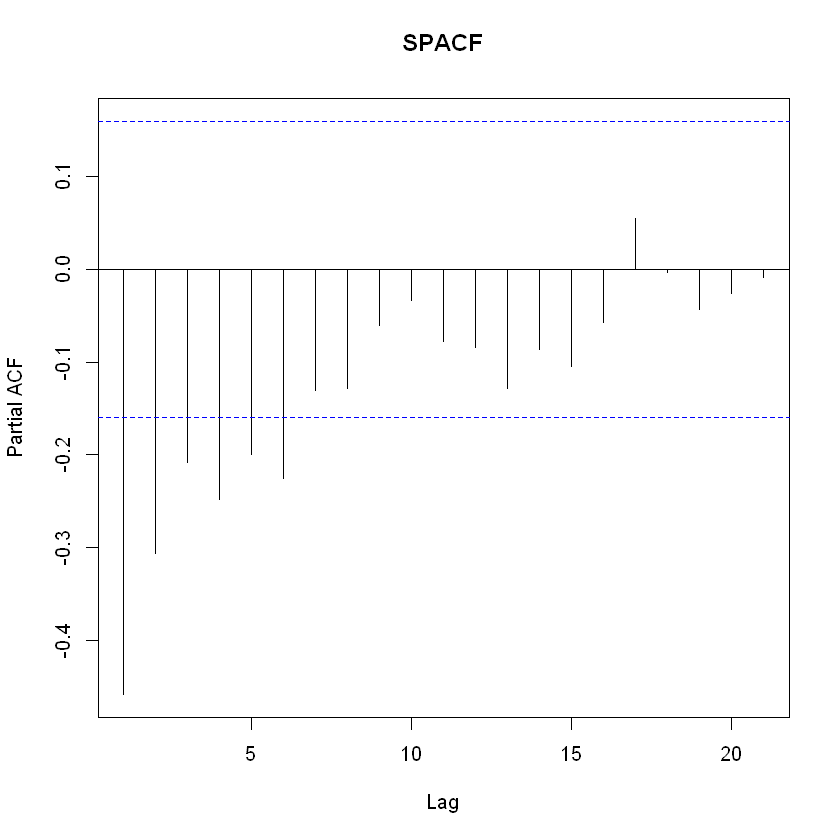

In [59]:
pacf(d.y2, main = "SPACF")

#### ARIMA 분석을 통해 bic가 최소가 되는 포인트를 찾아줍니다.

In [62]:
M=1
k=1
y2_bic=c()
for(p in 0:M) {
  for (q in 0:M) {
      fit2 = Arima(d.y2, order = c(p,1,q), method = 'ML')
      y2_bic[k] = fit2$bic
      k=k+1
      }
    }
which.min(y2_bic)
y2_bic

[1] 4

[1] 6785.860 6635.428 6706.128 6605.960

### 모형 예측 후 forecast 함수를 통해 앞으로의 값을 예측해보면 큰 변동을 겪은 직후이기 때문에 당분간 평균치를 유지할 것으로 예측되는 것을 볼 수 있습니다.
### 그 이후 다시 큰 폭등을 겪을 것으로 보입니다.

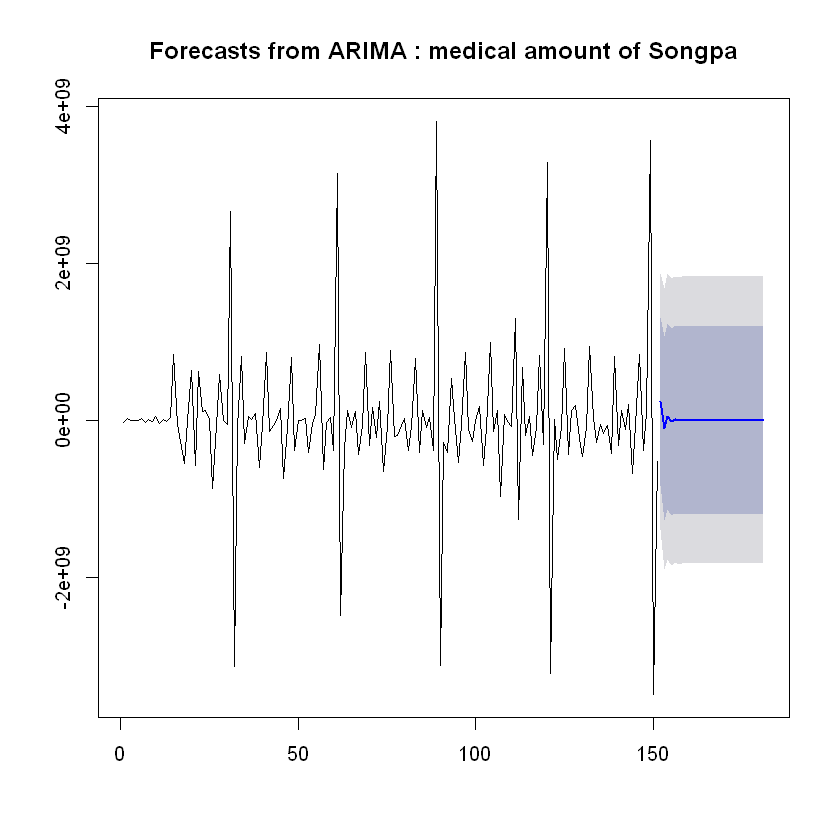

In [64]:
hat2 = forecast(fit2, h = 30)
plot(hat2,main="Forecasts from ARIMA : medical amount of Songpa")

### 화장품 판매량이 우수했던 관악구의 소비 패턴을 통해 관악구의 미용 품목에 대한 예측도 진행해보았습니다.

In [65]:
h_gwanak<- h_gu %>% filter(gu=='관악구')

In [67]:
y2_2=aggregate(h_gwanak$salamt, by=list(h_gwanak$date), FUN=sum)
head(y2_2)

Group.1,x
2020-01-04,57737390
2020-01-05,73199135
2020-01-06,45598615
2020-01-07,42595420
2020-01-08,30253810
2020-01-09,45101670


#### 대체로 추이는 나타나지 않으므로 정상 시계열이라고 볼 수 있습니다.

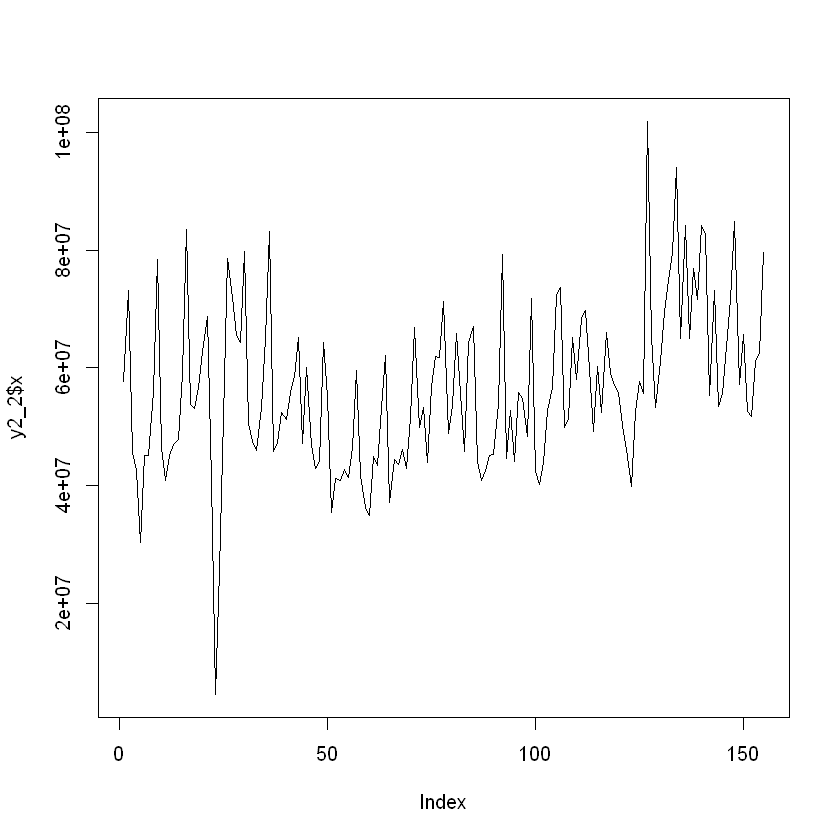

In [68]:
plot(y2_2$x, type="l")

#### ACF 그래프를 확인해보면 7마다 주기를 갖는 강한 자기 상관이 나타남
#### 7일 마다 비슷한 패턴이 반복되는 계절성 시계열이므로 계절 차분이 필요합니다.

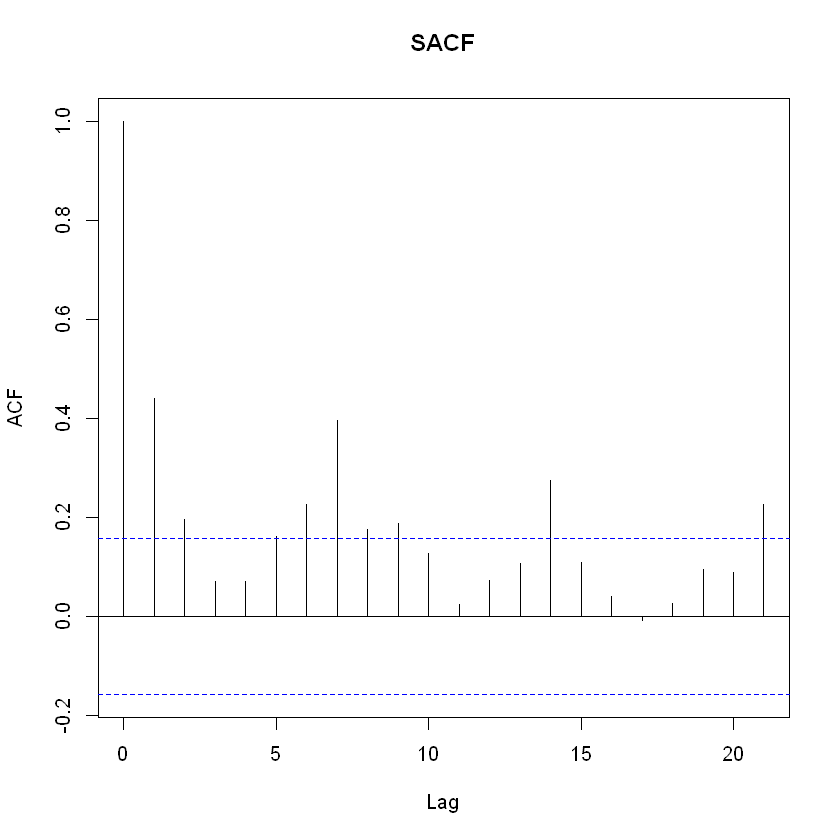

In [69]:
acf(y2_2$x, main="SACF")

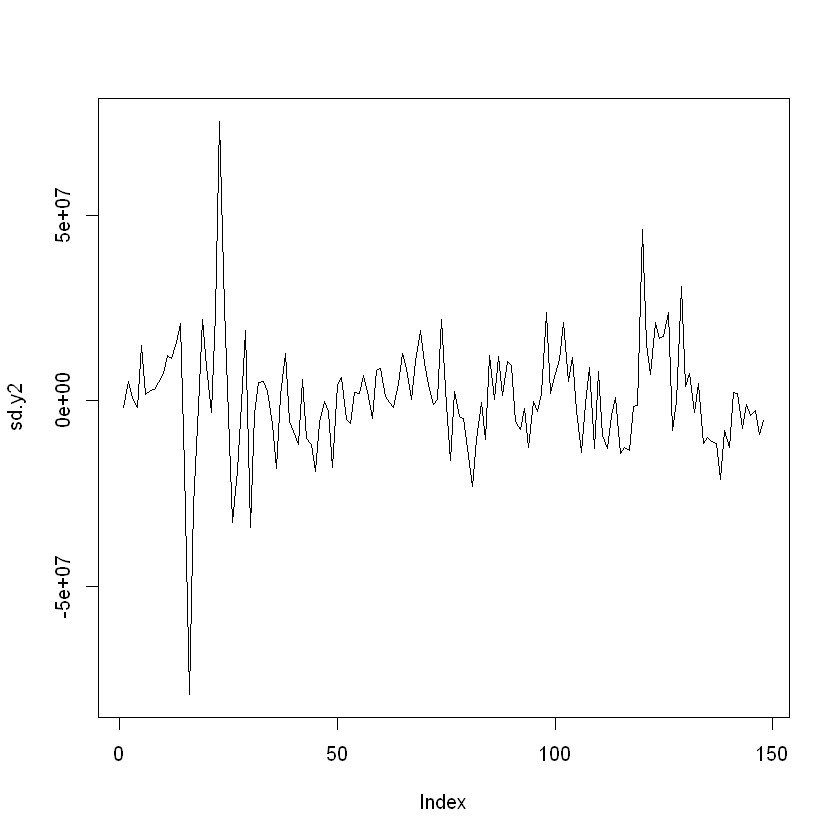

In [72]:
nd = length(y2_2$x)
sd.y2 = y2_2$x[8:nd]-y2_2$x[1:(nd-7)]
plot(sd.y2, type="l")

#### 계절 차분 후 7의 주기마다 나타나던 강한 자기상관이 사라진 것을 볼 수 있습니다.

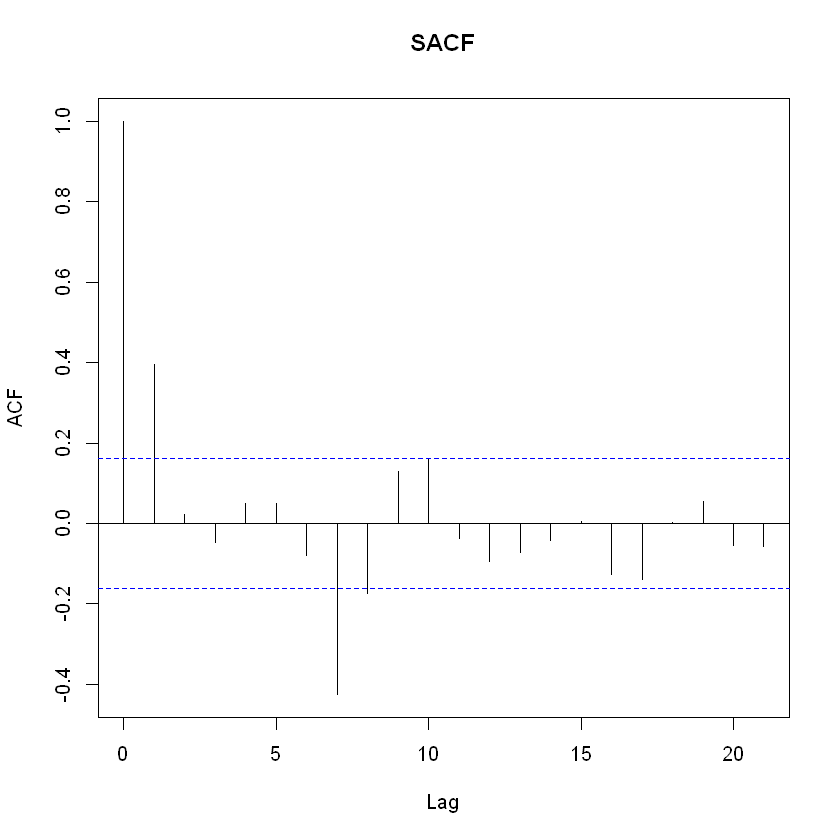

In [73]:
acf(sd.y2, main="SACF")

#### PACF에서는 극명하게 나타나진 않지만, 점차 소멸하는 싸인함수 형태이므로 ARMA 계열임을 알 수 있습니다.

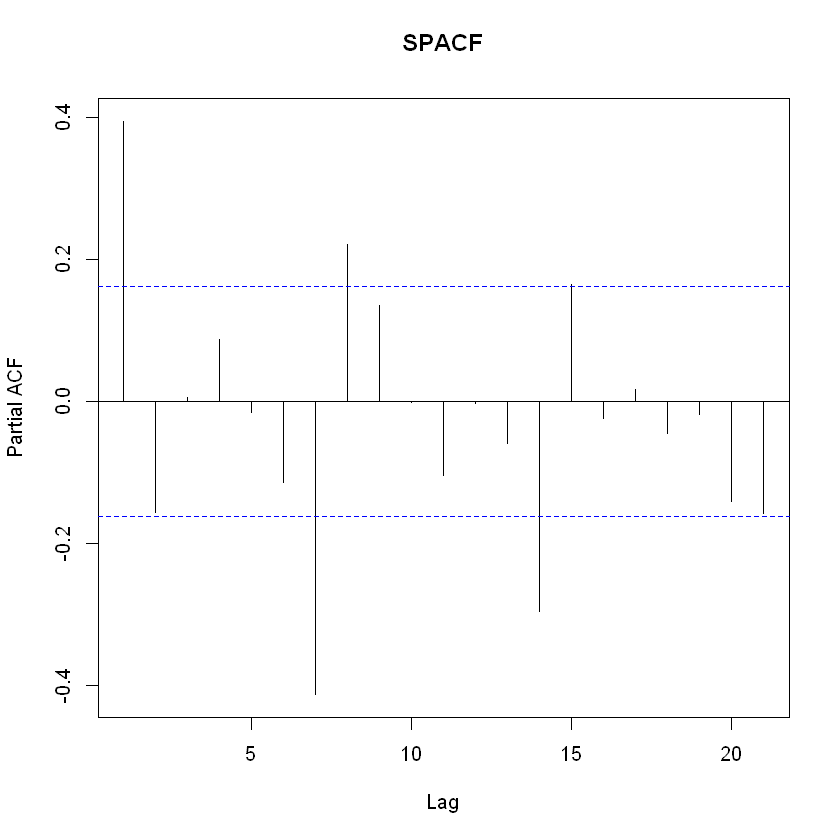

In [74]:
pacf(sd.y2, main="SPACF")

#### ARIMA 분석을 통해 bic가 최소가 되는 포인트를 찾아줍니다.

In [75]:
M=1
k=1
y_bic=c()
for(p in 0:M) {
  for (q in 0:M) {
    for (P in 0:M) {
      for (Q in 0:M) {
        fit = Arima(sd.y2, order = c(p,1,q),
                    seasonal = list(order = c(P,1,Q),
                                    period = 7),
                    method = 'ML')
        y_bic[k] = fit$bic
        k=k+1
      }
    }
  }
}
which.min(y_bic)
y_bic

[1] 16

[1] 5217.353 5090.671 5144.358 5061.495 5194.107 5077.005 5126.250 5047.900
 [9] 5218.094 5090.375 5139.450 5059.307 5178.121 5058.132 5108.886 5034.309

### 모형 예측 후 forecast 함수를 통해 앞으로의 값을 예측해보면 최근의 증가 추세를 이어 받아 당분간 잠시 증가하다가 다시 평균치의 소비로 돌아갈 것으로 예측되는 것을 볼 수 있습니다.

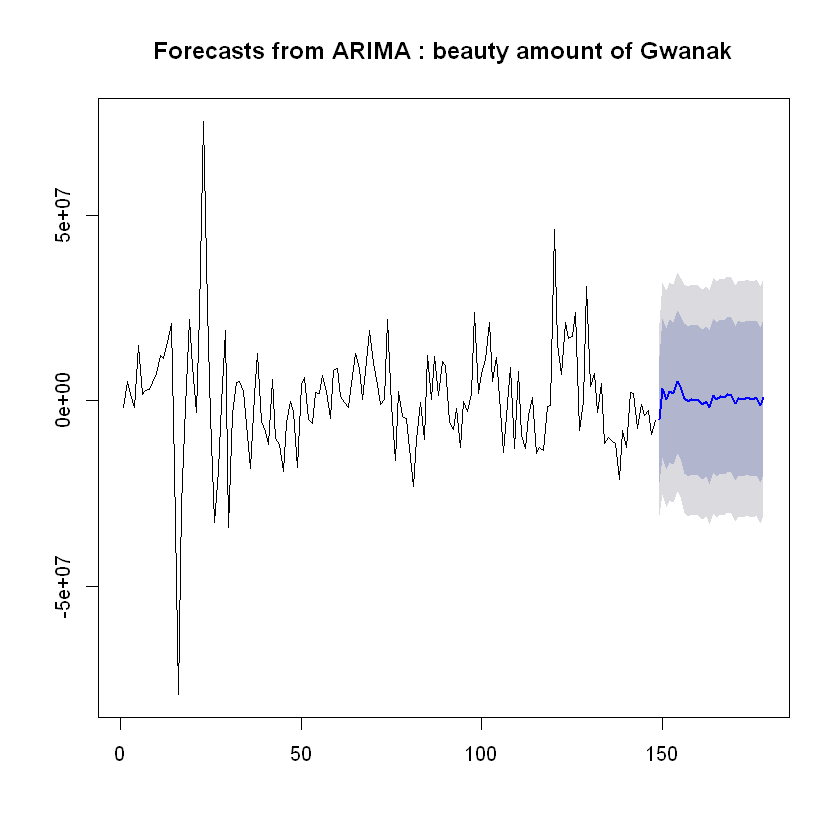

In [76]:
hat = forecast(fit, h = 30)
plot(hat,main="Forecasts from ARIMA : beauty amount of Gwanak")

### 관악구는 학원 항목에 있어서도 특이한 소비 패턴을 나타냈기에 추가로 예측을 진행해보았습니다.

In [77]:
a_gwanak<- a_gu %>% filter(gu=='관악구')

In [78]:
y2_3=aggregate(a_gwanak$salamt, by=list(a_gwanak$date), FUN=sum)
head(y2_3)

Group.1,x
2020-01-04,42358250
2020-01-05,4803000
2020-01-07,77317380
2020-01-08,29010600
2020-01-09,16689000
2020-01-10,14701800


#### 증감 폭이 매우 크지만, 대체로 추이는 나타나지 않으므로 정상 시계열이라고 볼 수 있습니다.

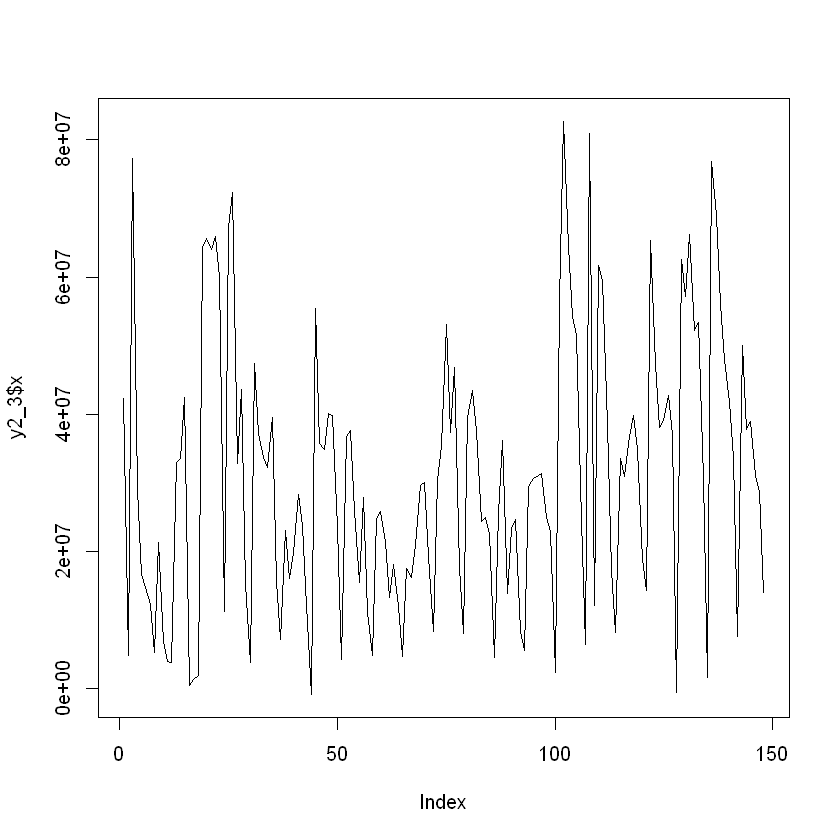

In [79]:
plot(y2_3$x, type="l")

#### ACF 그래프를 확인해보면 시차 7마다 미묘하게 주기를 갖는 강한 자기 상관이 나타남
#### 7일 마다 비슷한 패턴이 반복되는 계절성 시계열이므로 계절 차분이 필요합니다.

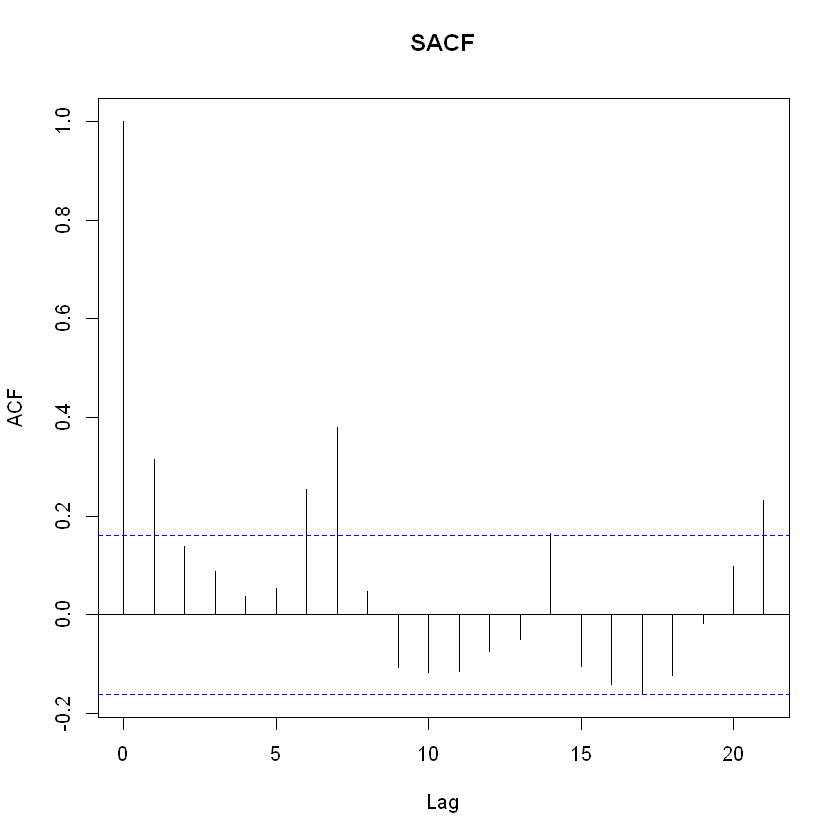

In [80]:
acf(y2_3$x, main="SACF")

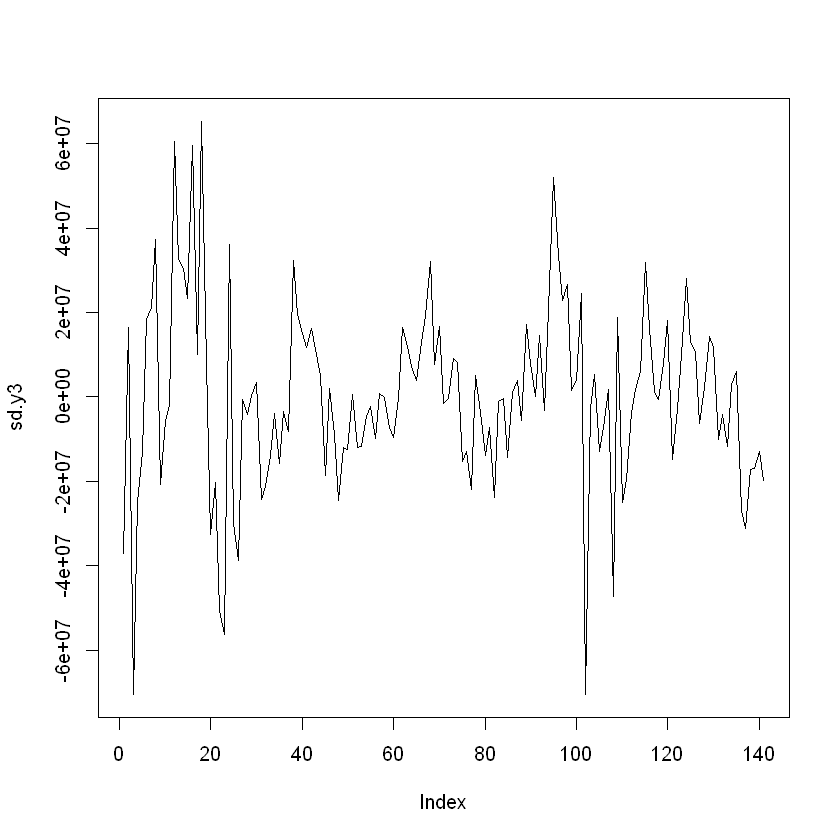

In [82]:
nd = length(y2_3$x)
sd.y3 = y2_3$x[8:nd]-y2_3$x[1:(nd-7)]
plot(sd.y3, type="l")

#### 계절 차분 후 7의 주기마다 나타나던 강한 자기상관이 사라진 것을 볼 수 있습니다.

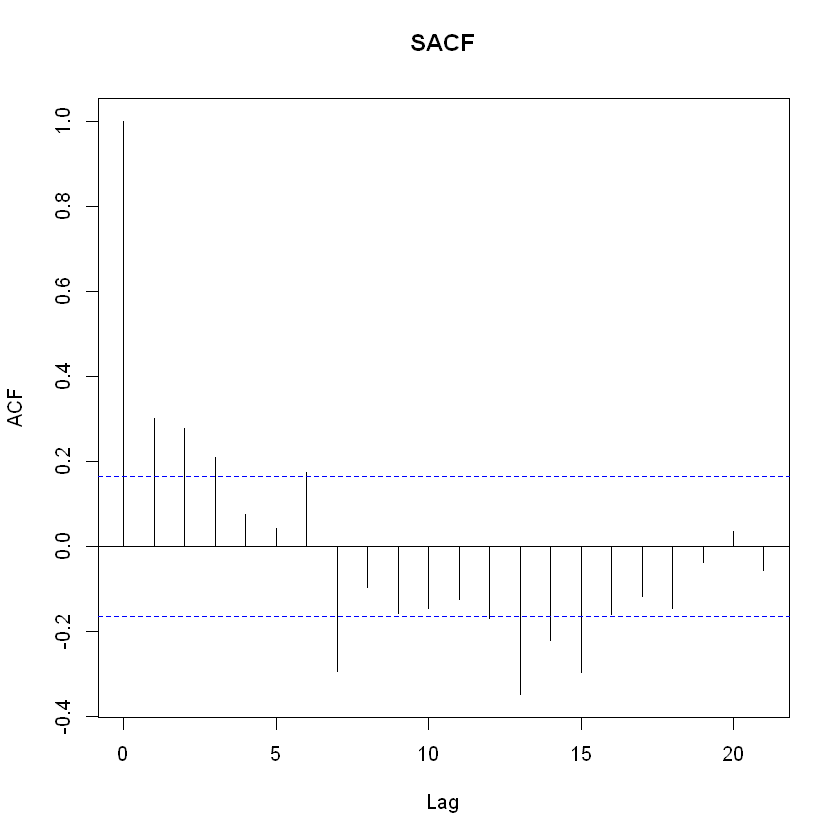

In [83]:
acf(sd.y3, main="SACF")

#### PACF에서는 극명하게 나타나진 않지만, 점차 소멸해가는 싸인함수 형태이므로 ARMA 계열임을 알 수 있습니다.

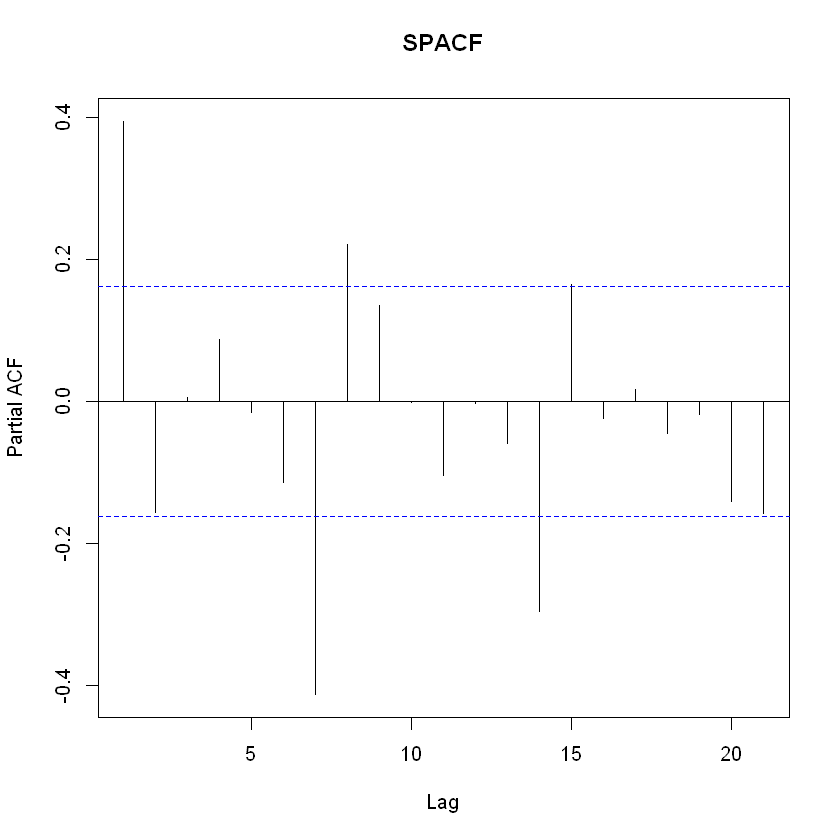

In [84]:
pacf(sd.y2, main="SPACF")

#### ARIMA 분석을 통해 bic가 최소가 되는 포인트를 찾아줍니다.

In [85]:
M=1
k=1
y_bic=c()
for(p in 0:M) {
  for (q in 0:M) {
    for (P in 0:M) {
      for (Q in 0:M) {
        fit = Arima(sd.y3, order = c(p,1,q),
                    seasonal = list(order = c(P,1,Q),
                                    period = 7),
                    method = 'ML')
        y_bic[k] = fit$bic
        k=k+1
      }
    }
  }
}
which.min(y_bic)
y_bic

[1] 8

[1] 5064.850 4953.948 4977.064 4924.493 5011.039 4910.567 4951.357 4895.834
 [9] 5026.239 4924.820 4961.895 4909.478 5015.345 4915.400 4955.935 4900.133

### 모형 예측 후 forecast 함수를 통해 앞으로의 값을 예측해보면 최근 30일간 소비량이 꾸준히 하락한 이후 당분간 잠시 급증하다가 다시 평균치의 소비로 돌아갈 것으로 예측됩니다. 

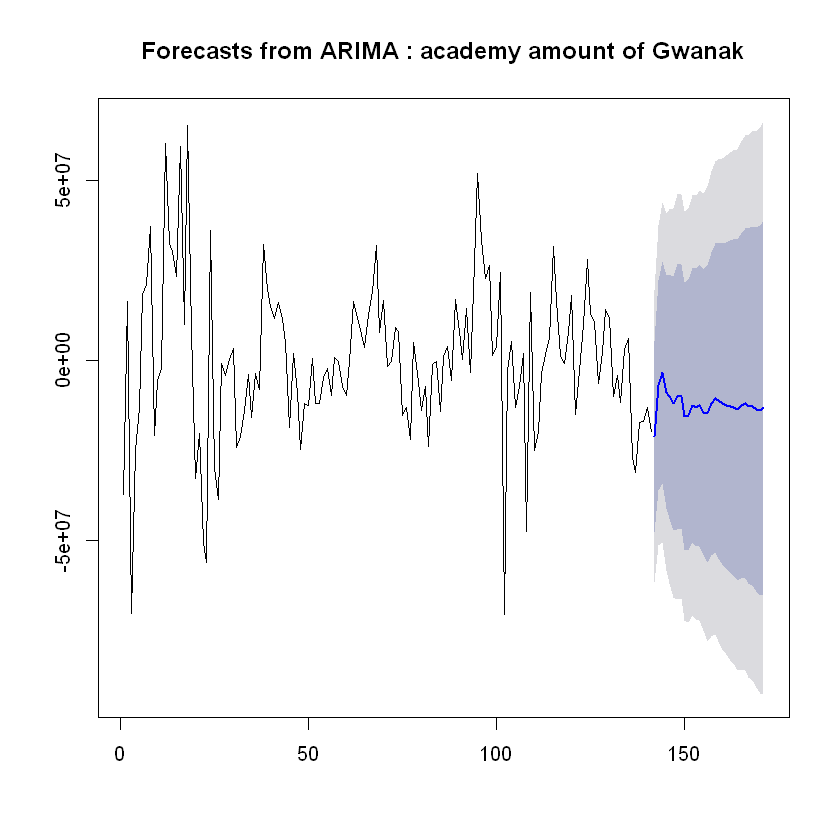

In [86]:
hat = forecast(fit, h = 30)
plot(hat,main="Forecasts from ARIMA : academy amount of Gwanak")

### 전국 배달 소비 패턴의 예측

#### 취소 건을 제외하고, 배달비 + 중개수수료 + 물품 값의 합을 새로운 열로 지정하였습니다.

In [46]:
delivery_all=subset(delivery, DLVR_REQUST_STTUS_VALUE=='1')

In [47]:
delivery_tot<-delivery %>%
mutate(total = DLVR_AMOUNT+CALL_RLAY_FEE_AMOUNT+GOODS_AMOUNT)

In [53]:
y3=aggregate(delivery_tot$total, by=list(delivery_tot$PROCESS_DT), FUN=sum)
head(y3)

Group.1,x
2020-01-01,855590249
2020-01-02,581522932
2020-01-03,696230540
2020-01-04,821082238
2020-01-05,840514740
2020-01-06,1210556956


#### 증가 추세 즉, 약간의 비정상성을 띠고 있음 -> 차분 필요

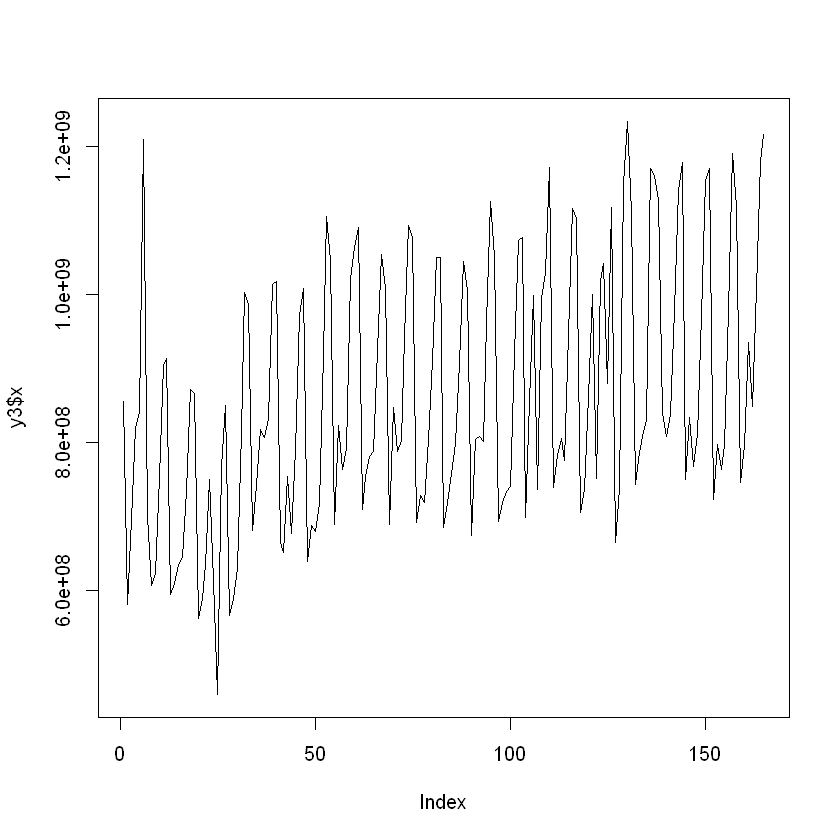

In [54]:
plot(y3$x, type="l")

#### 차분 후 비정상성이 완전히 사라진 것을 볼 수 있습니다.

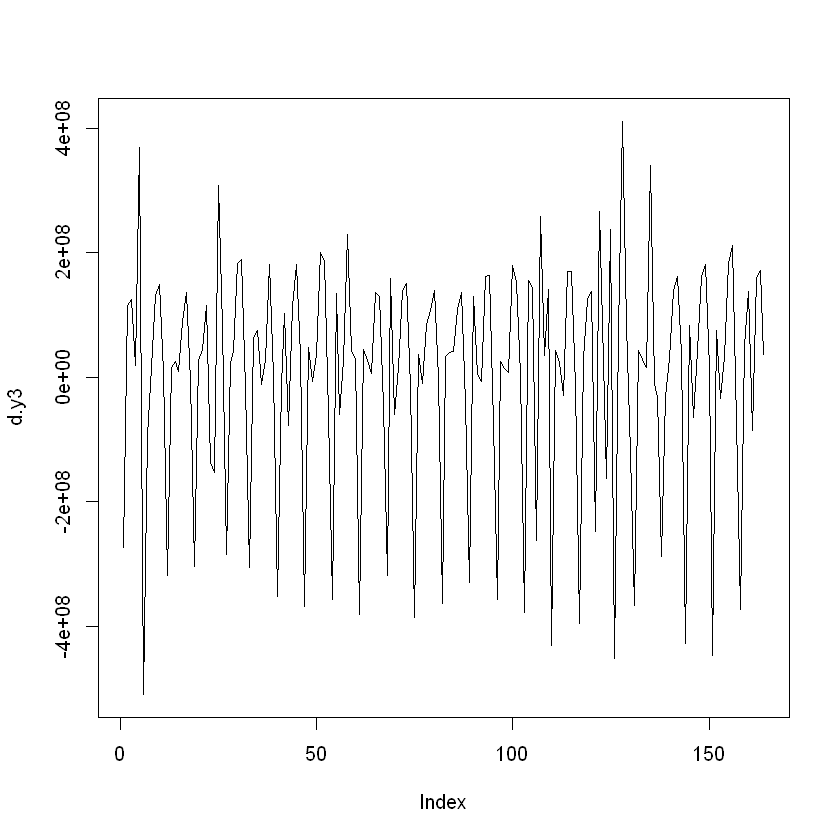

In [197]:
nd = length(y3$x)
d.y3 = y3$x[2:nd]-y3$x[1:(nd-1)]
plot(d.y3, type="l")

#### ACF 그래프를 확인해보면 7마다 주기를 갖는 강한 자기 상관이 나타남
#### 7일 마다 비슷한 패턴이 반복되는 계절성 시계열이므로 계절 차분이 필요합니다.

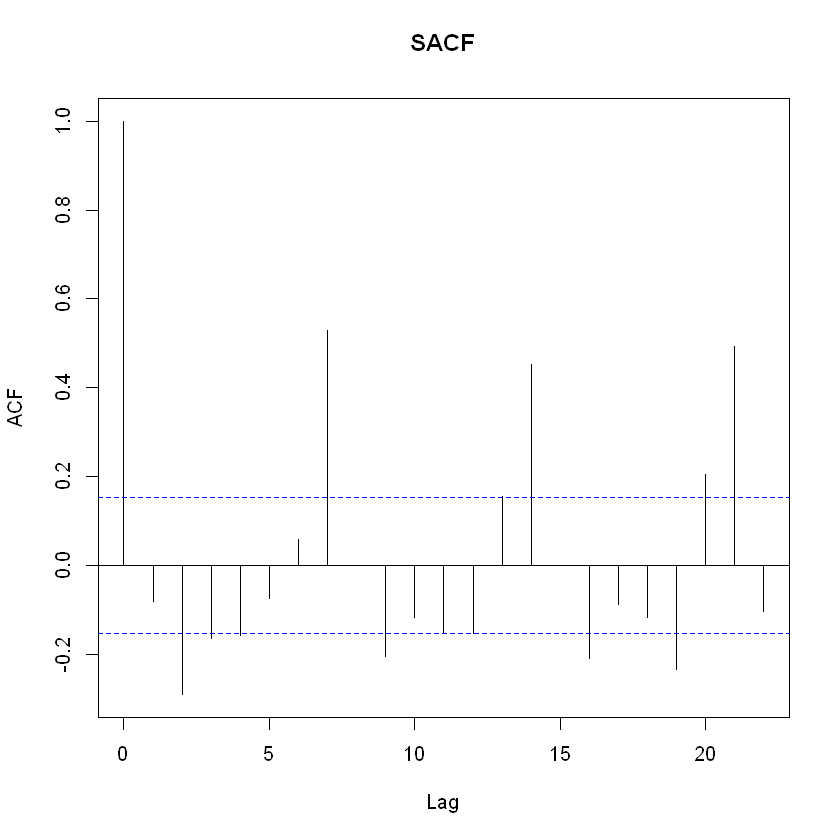

In [198]:
acf(d.y3, main = "SACF")

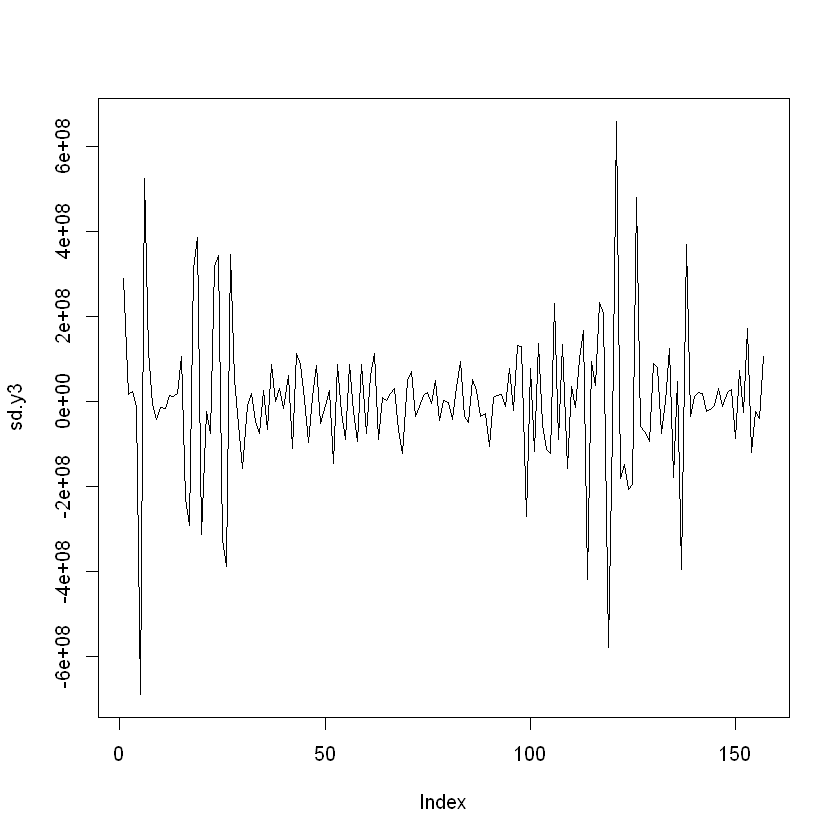

In [201]:
nd = length(d.y3)
sd.y3 = d.y3[8:nd]-d.y3[1:(nd-7)]
plot(sd.y3, type="l")

#### 계절 차분 후 7의 주기마다 나타나던 강한 자기상관이 대부분 사라진 것을 볼 수 있습니다.

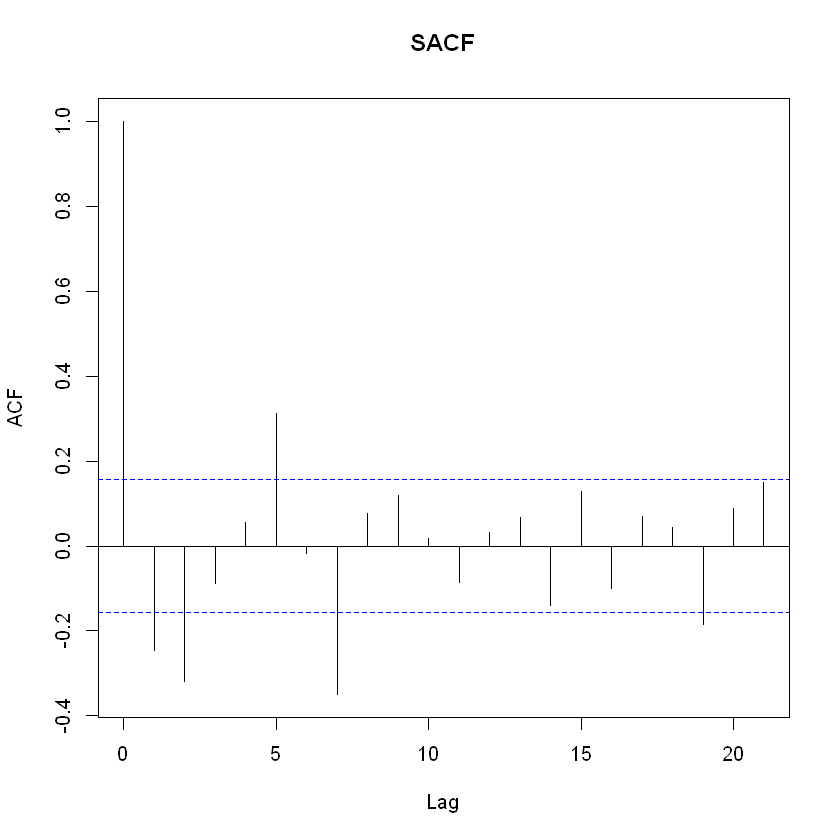

In [202]:
acf(sd.y3, main="SACF")

#### PACF : 소멸해가는 싸인함수 형태이므로 ARMA 계열임을 알 수 있습니다.

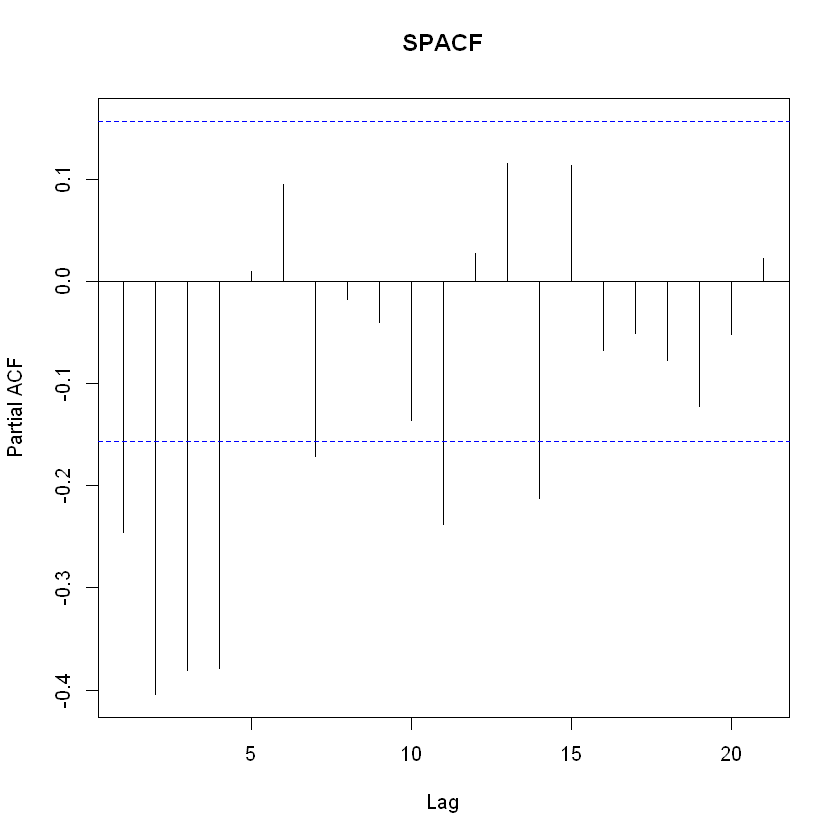

In [203]:
pacf(sd.y3, main = "SPACF")

#### ARIMA 분석을 통해 bic가 최소가 되는 포인트를 찾아줍니다.

In [204]:
M=1
k=1
y3_bic=c()
for(p in 0:M) {
  for (q in 0:M) {
    for (P in 0:M) {
      for (Q in 0:M) {
        fit3 = Arima(sd.y3, order = c(p,1,q),
                    seasonal = list(order = c(P,1,Q),
                                    period = 7),
                    method = 'ML')
        y3_bic[k] = fit3$bic
        k=k+1
      }
    }
  }
}
which.min(y3_bic)
y3_bic

[1] 16

[1] 6343.523 6239.711 6303.101 6231.166 6225.323 6118.388 6176.262 6104.346
 [9] 6321.876 6207.978 6268.225 6189.858 6225.288 6114.177 6170.460 6094.829

### 모형 예측 후 forecast 함수를 통해 앞으로의 값을 예측해보면 초기값 1월 4일로부터 30 ~ 90일 이후인 약 2-4월의 소비와 비슷하게 예측되는 것을 볼 수 있습니다.

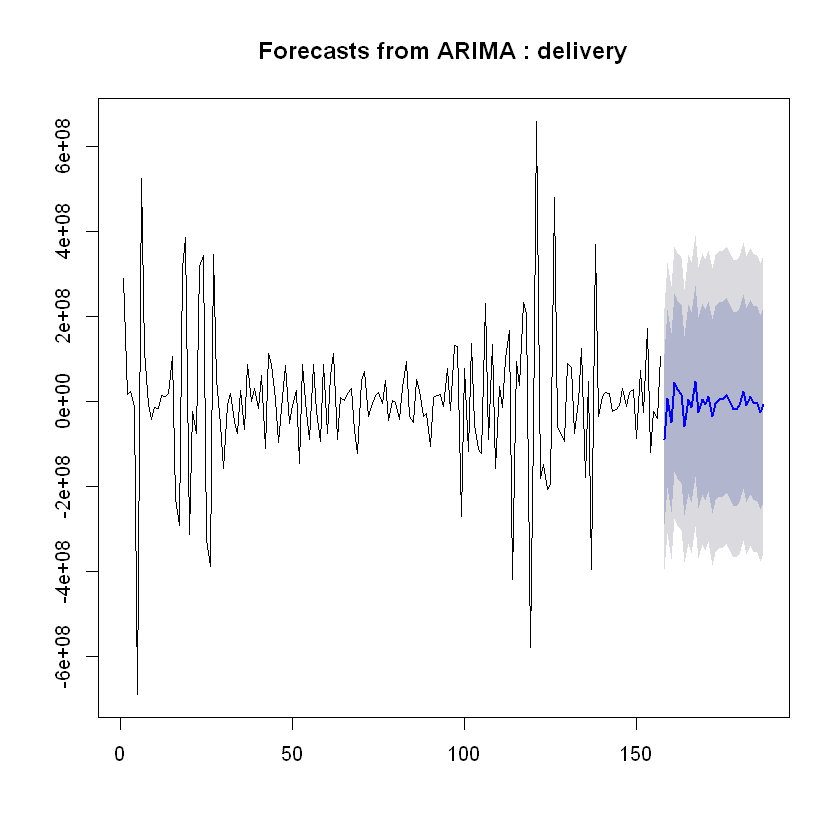

In [205]:
hat3 = forecast(fit3, h = 30)
plot(hat3,main="Forecasts from ARIMA : delivery")

### 서울특별시의 배달 패턴 예측

#### 배달 데이터에서 실제로 서울에서 배달이 이루어진 경우만 추출하여 비용을 계산, 새로운 데이터를 생성하였습니다.

In [88]:
delivery_seoul=subset(delivery, DLVR_REQUST_STTUS_VALUE=='1'& DLVR_STORE_SIDO=='서울특별시')

In [89]:
delivery_seoul_tot<-delivery_seoul %>%
mutate(total = DLVR_AMOUNT+CALL_RLAY_FEE_AMOUNT+GOODS_AMOUNT)

In [90]:
head(delivery_seoul_tot)

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,total
4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NA,26600
4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,...,3800,300,28000,2,NA,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NA,32100
4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,1156013300,서울특별시,영등포구,...,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,NA,22000
4578014,2020-01-01,C000101,1,C000104,S0021942,치킨,1156013200,서울특별시,영등포구,...,3900,300,19000,2,NA,2020-01-01 00:02:53,2020-01-01 00:16:01,2020-01-01 00:42:53,NA,23200
4578020,2020-01-01,C000209,1,C000209,S0022364,치킨,1154510200,서울특별시,금천구,...,4300,300,21000,1,승인:하나카드,2020-01-01 01:27:08,2020-01-01 01:27:25,2020-01-01 01:37:01,NA,25600
4578021,2020-01-01,C000104,1,C000102,S0040978,야식,1156013300,서울특별시,영등포구,...,4300,300,35000,2,NA,2020-01-01 00:04:04,2020-01-01 00:11:23,2020-01-01 01:01:47,NA,39600


In [91]:
y4=aggregate(delivery_seoul_tot$total, by=list(delivery_seoul_tot$PROCESS_DT), FUN=sum)
head(y4)

Group.1,x
2020-01-01,145043420
2020-01-02,91018800
2020-01-03,113904401
2020-01-04,139242105
2020-01-05,139720550
2020-01-06,183918838


#### 전국 데이터와 달리 대체적으로 평균이 일정하므로 정상 시계열이라고 볼 수 있습니다.

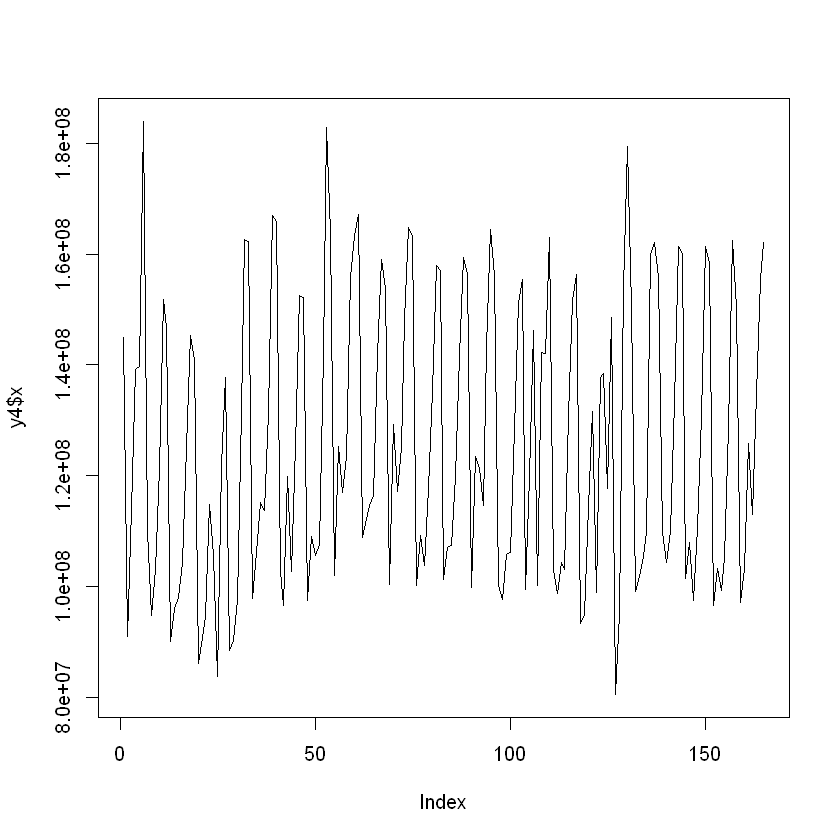

In [92]:
plot(y4$x, type="l")

#### ACF를 본 결과, 시차 7마다 주기를 갖는  갖는 강한 자기 상관이 나타나므로 계절성 시계열임을 알 수 있습니다.
#### 따라서 계절 차분이 필요합니다.

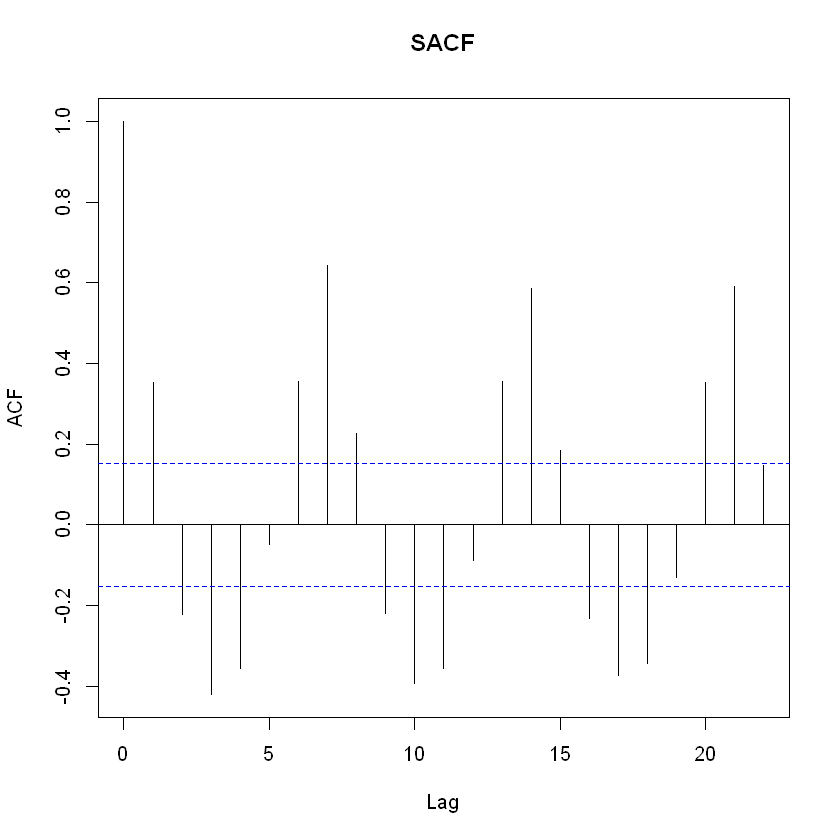

In [93]:
acf(y4$x, main = "SACF")

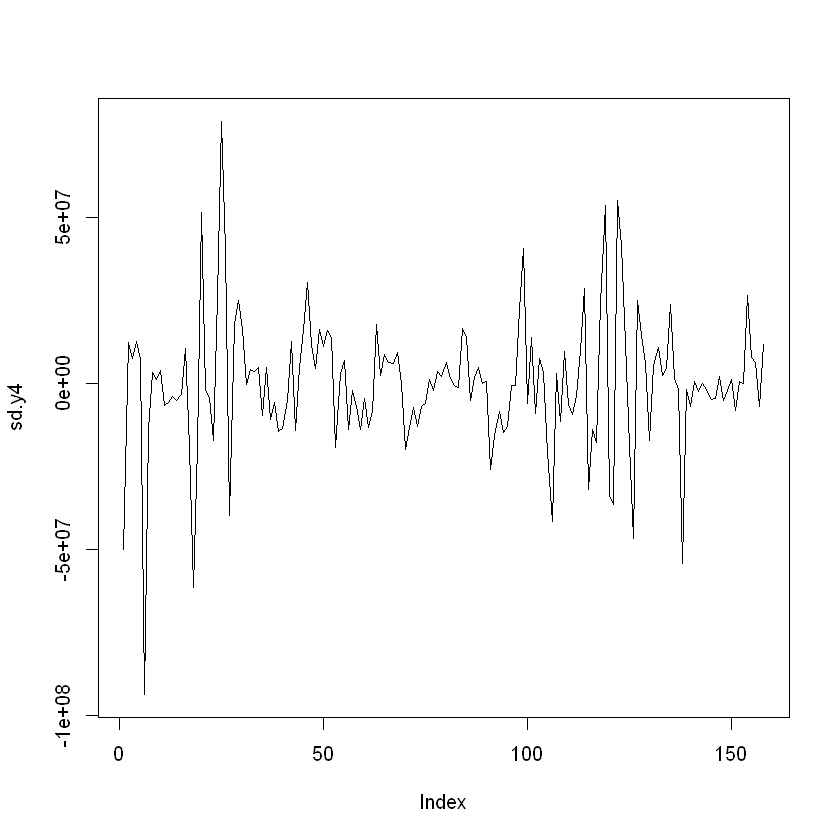

In [94]:
nd = length(y4$x)
sd.y4 = y4$x[8:nd]-y4$x[1:(nd-7)]
plot(sd.y4, type="l")

#### 계절 차분 후 7의 주기마다 나타나던 강한 자기상관이 대부분 사라진 것을 볼 수 있습니다.

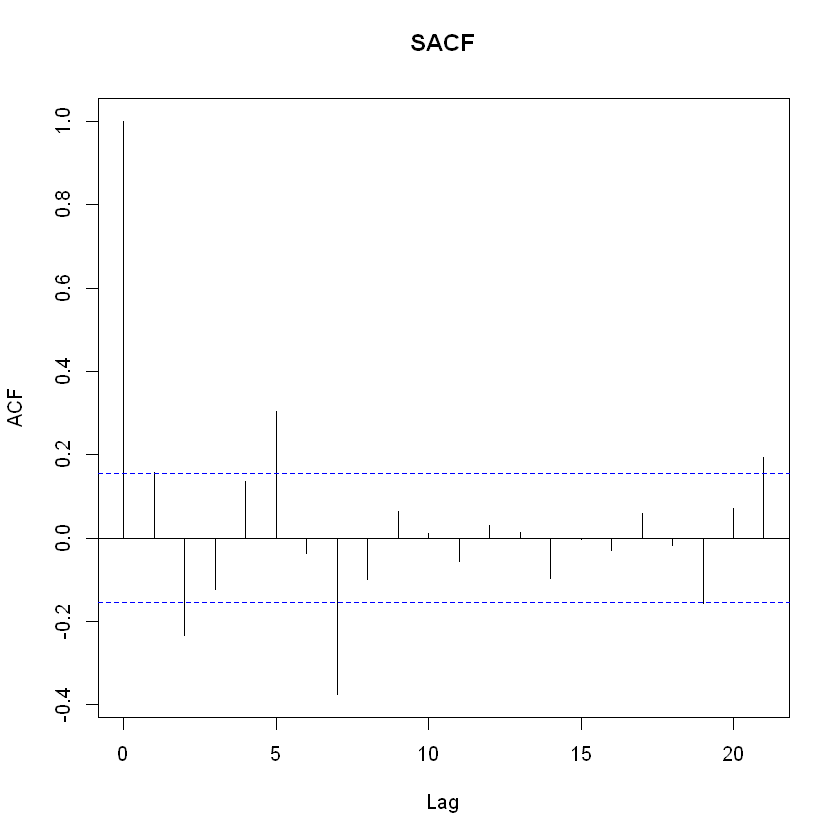

In [95]:
acf(sd.y4, main="SACF")

#### PACF : 진동폭은 매우 크지만 점차 소멸하는 싸인함수 형태이므로 ARMA 계열임을 알 수 있습니다.

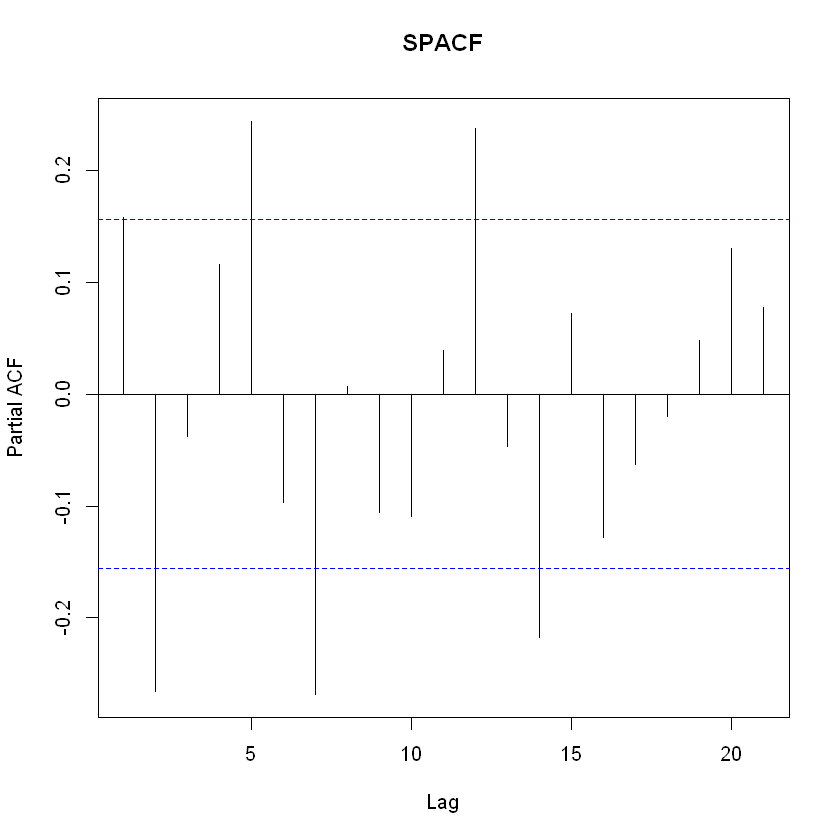

In [96]:
pacf(sd.y4, main="SPACF")

#### ARIMA 분석을 통해 bic가 최소가 되는 포인트를 찾아줍니다.

In [97]:
M=1
k=1
y4_bic=c()
for(p in 0:M) {
  for (q in 0:M) {
    for (P in 0:M) {
      for (Q in 0:M) {
        fit4 = Arima(sd.y4, order = c(p,1,q),
                    seasonal = list(order = c(P,1,Q),
                                    period = 7),
                    method = 'ML')
        y4_bic[k] = fit4$bic
        k=k+1
      }
    }
  }
}
which.min(y4_bic)
y4_bic

[1] 8

[1] 5701.065 5587.736 5647.741 5570.740 5638.315 5526.770 5581.873 5508.469
 [9] 5699.780 5583.162 5642.567 5562.187 5637.998 5527.523 5582.877 5510.347

### 모형 예측 후 forecast 함수를 통해 앞으로의 값은 소폭의 증가 추세를 이어가다가 평균치에서 진동할 것으로 예측됨을 알 수 있습니다.

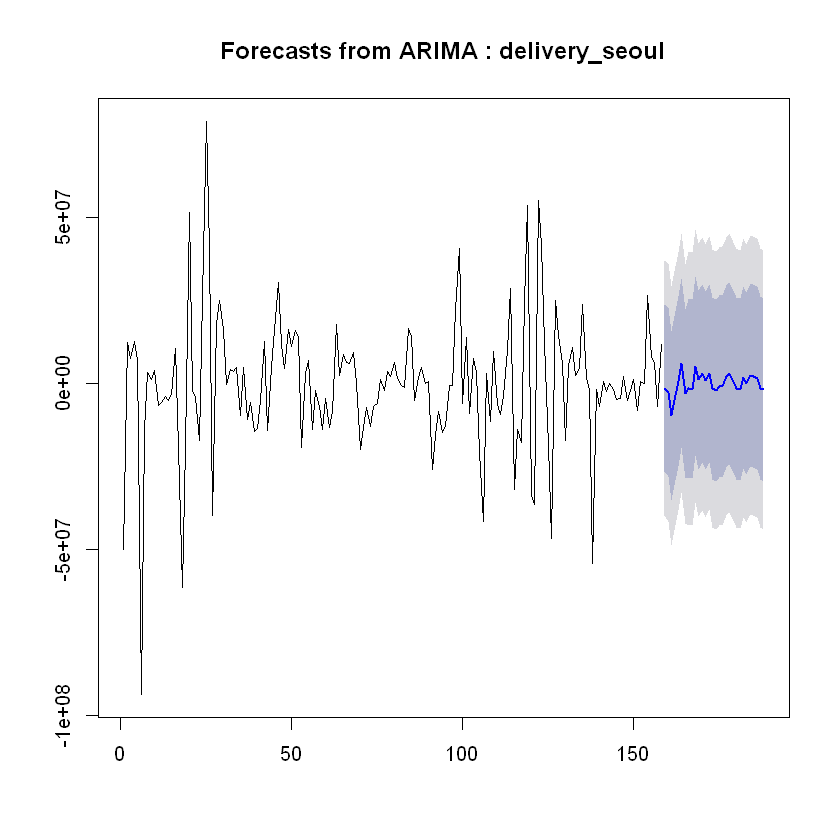

In [98]:
hat4 = forecast(fit4, h = 30)
plot(hat4,main="Forecasts from ARIMA : delivery_seoul")

## 결론

### 우선 ggplot을 활용한 시각화에서는, 소비지수에 따른 카테고리의 비율은 화장품이, 시군구에 따른 카테고리의 비율은 식품이 가장 높다는 결과와 나이에 따른 소비지수의 비율은 나이가 어릴수록 높았으며 코로나 확진자 수는 20대가 가장 많았고 여성의 성비가 좀 더 높았습니다. 확진자들의 지역 분포는 대구가 압도적으로 많았고 각 품목의 소비량은 전반적으로 확진자가 늘어감에 따라 감소하였다가 다시 증가하는 추세를 보였습니다. 워드 클라우드 시각화에서는 높은 확진자 수를 가진 그룹인 20대 여성을 중심으로 소비 패턴을 분석했을 때 미용, 취미, 음식 품목의 경우 다양한 결과가 골고루 분포되어 있었던 반면, 의료 품목의 경우 마스크에 관련된 검색어들만 존재하여 코로나 사태의 모습을 잘 나타내는 모습을 보였습니다.
### 지역별 확진자 수 clustering에서는 확진자들이 나온 지역 데이터의 교육기관, 노인시설 개수 등의 요인들만으로는 도시들의 99%가 같은 군집으로 분류되는 결과를 보이며 분류의 요소로 작용하지 못함을 보여주었습니다. 서울 구별 카드 소비량 clustering에서는 강남, 서초, 송파 / 관악, 강서, 마포 / 구로, 금천, 종로 등 실제 카드 소비 순위와 비슷하게 분류되었습니다.
### 시계열 ARIMA 분석에서는 소비 패턴을 예측하기 위해 많은 확진자가 나온 지역과 소비지수가 눈에 띄는 지역의 품목별 지출액을 알아보았습니다. 확진자 수가 가장 많은 관악구는 초반에 매우 큰 진동 폭을 띠고 있었으며 소비 증가 추세를 보였고 7일마다 비슷한 패턴이 반복되었습니다. 모형 예측 후 앞으로의 값은 1월 4일로부터 60 ~ 100일 이후인 약 3-5월의 소비와 비슷할 것으로 예측되었습니다. 송파구에서 눈에 띄었던 의료소비 패턴은 일부 구간에서 매우 큰 진동 폭과 비정상성을 띠고 있었고 계절성 시계열이 아니었습니다. 지금까지 큰 변동을 겪었으며 당분간은 평균치를 유지할 것으로 예측되었으나 그 이후 다시 폭등을 겪을 것으로 보입니다. 화장품 판매량이 우수했던 관악구의 소비 패턴에서는 대체로 추이는 나타나지 않는 정상 시계열임이 보였고 7일마다 비슷한 패턴이 반복되었습니다. 앞으로는 최근의 증가 추세를 이어받아 당분간 잠시 증가하다가 다시 평균치의 소비로 돌아갈 것으로 예측되었습니다. 관악구는 학원 항목에 있어서도 특이한 소비량을 나타냈기에 추가로 예측해보았습니다. 증감 폭이 매우 크지만 추이는 나타나지 않았고 7일마다 비슷한 패턴이 반복되는 계절성 시계열이었으며 최근 30일간 소비량이 꾸준히 하락한 이후 당분간 잠시 급증하다가 다시 평균치의 소비로 돌아갈 것으로 예측됩니다. 전국 배달 소비 패턴은 증가 추세를 띠고 있었고 역시 7일마다 비슷한 패턴이 반복되는 계절성 시계열이었습니다. 앞으로는 약 2-4월의 소비와 비슷할 것으로 전망됩니다. 서울특별시의 배달 패턴은 전국 데이터와 달리 대체적으로 평균이 일정하였고 마찬가지로 7일마다 반복되는 계절성 시계열임을 알 수 있었습니다. 앞으로는 소폭의 증가 추세를 이어가다가 평균치에서 진동할 것으로 보였습니다.
### 이처럼 코로나 사태가 진행된 이후 소비에도 많은 변동이 일어났습니다. 초반에는 소비량이 확 줄다가 점차 증가하는 모습이 공통적으로 보여 생활에도 큰 변화가 있었던 만큼 혼란이 반영된 결과로 보입니다. 다만 과거의 소비 패턴과도 비슷한 부분이 많았고 확진자 수에 비례하지 않는 결과가 많았기 때문에 확진자 숫자에 직접적으로 영향을 받는다고는 보기 어렵습니다. 하지만 올해 상반기의 소비 데이터와 확진자 데이터를 반영하여 소비를 주목할 만한 부분에 있어서 데이터를 분석한 만큼 포스트 코로나의 소비를 예측하는 데 도움이 될 수 있는 지표가 될 수 있을 것입니다.